# Comprehensive Analysis of Fuel Consumption Dataset

## Course: DSA 8305 - Linear Models

### Group Members:
- **Kevin Obote** - *190696*
- **Kennedy Chelang'a** -  
- **Jackline Mboya** - *193670*
- **Walter Oyugi** - *120448*
- **Elias Shamala** - 



### Objective:
This notebook provides a comprehensive analysis of the `FuelConsumption.csv` dataset. The primary goal is to predict **CO2 emissions** based on various vehicle characteristics. The analysis includes the following steps:
1. **Data Exploration**: Understanding the structure and distribution of the dataset.
2. **Feature Engineering**: Creating and selecting relevant features for modeling.
3. **Model Building**: Developing and comparing regression models (simple and multiple).
4. **Diagnostic Testing**: Evaluating model assumptions and performance.



### Dataset Overview:
The dataset contains information about fuel consumption and CO2 emissions for various vehicles. Key variables include:
- **Engine Size** (`ENGINESIZE`)
- **Cylinders** (`CYLINDERS`)
- **Fuel Consumption** (`FUELCONSUMPTION_CITY`, `FUELCONSUMPTION_HWY`, `FUELCONSUMPTION_COMB`)
- **CO2 Emissions** (`CO2EMISSIONS`)



### Deliverables:
- A detailed comparison of **simple linear regression** and **multiple linear regression** models.
- Statistical summaries, performance metrics, and diagnostic plots.
- Insights and recommendations based on the analysis.

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data Handling and Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis and Hypothesis Testing
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.stattools import adfuller

# Machine Learning - Data Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# Machine Learning - Model Selection and Validation
from sklearn.model_selection import train_test_split, cross_val_score

# Machine Learning - Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Feature Selection
from sklearn.feature_selection import SelectFromModel

# Evaluation Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, log_loss

## 1. Data Exploration

In [4]:
# Load the dataset
df = pd.read_csv('FuelConsumption.csv')

# Display basic information about the dataset
print("Dataset Info:")
print("\nShape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:")
print(df.dtypes)

Dataset Info:

Shape: (1067, 13)

Columns: ['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS', 'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']

Data Types:
MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object


In [5]:

# Display summary statistics
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicates
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")


Missing Values:
MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

Number of duplicate rows: 0


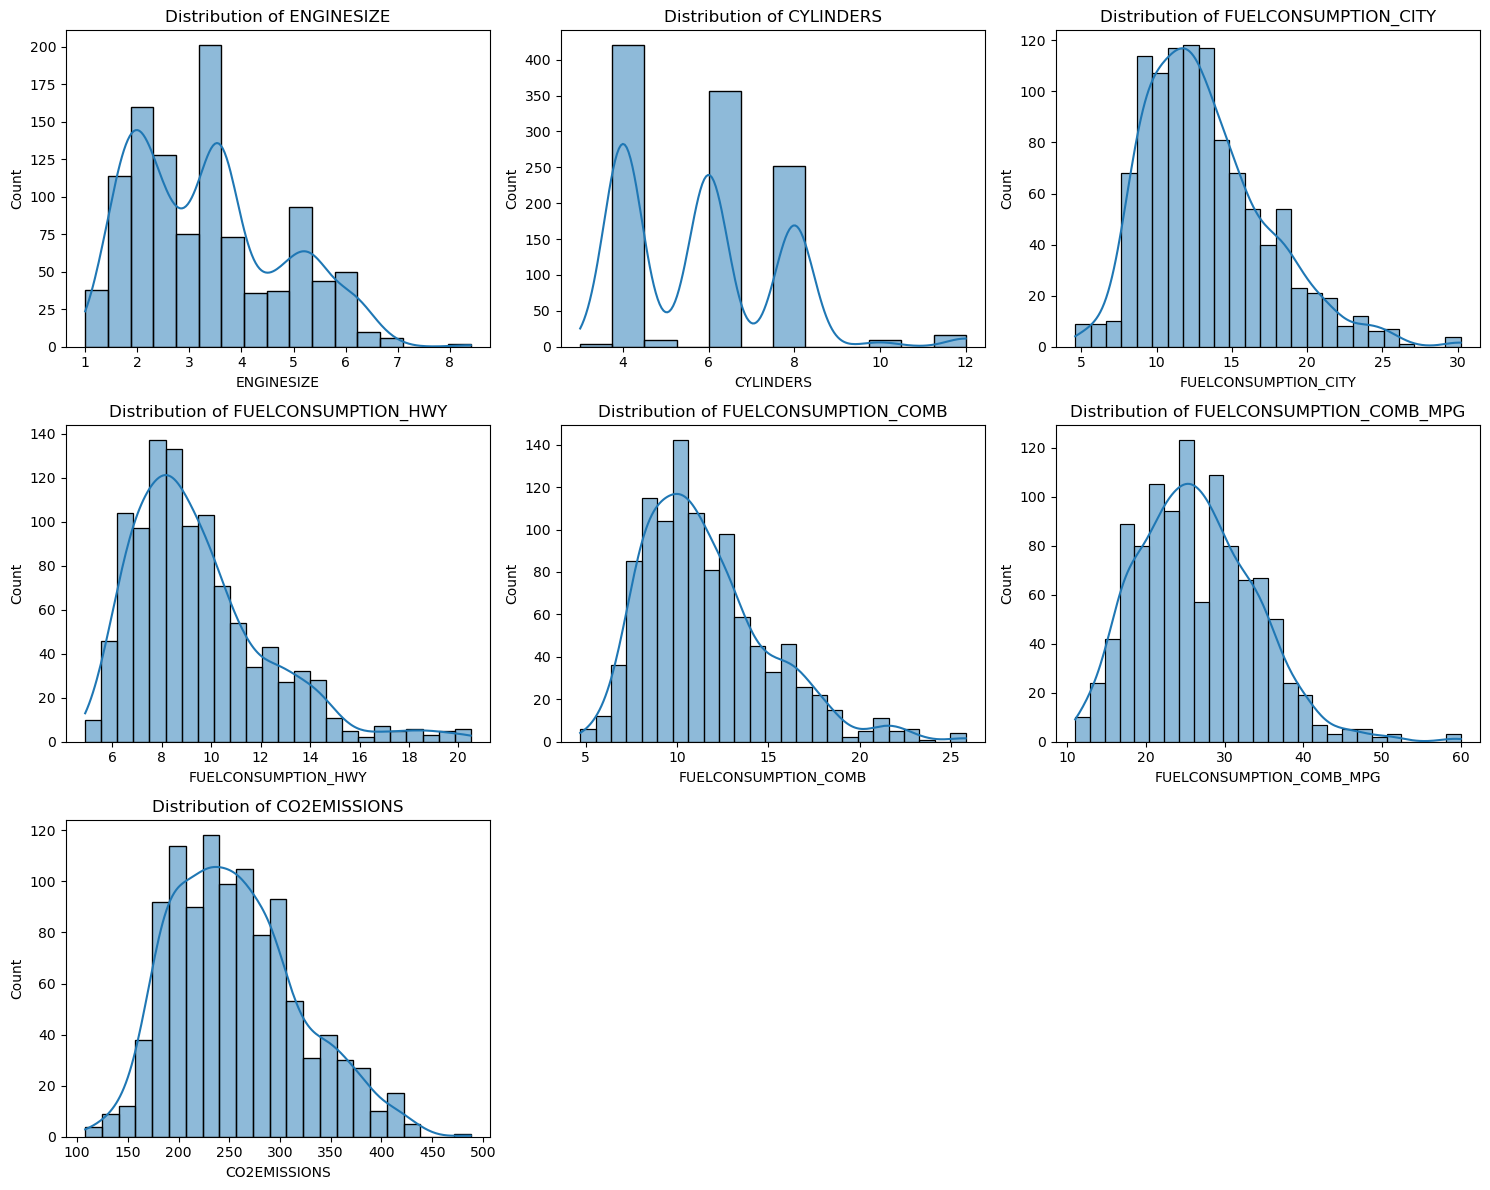

In [7]:
# Automatically identify numeric columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features = [col for col in numerical_features if col != 'MODELYEAR']
# Calculate number of rows needed
n_features = len(numerical_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols  # This ensures we have enough rows

# Create the figure
plt.figure(figsize=(15, 4*n_rows))

# Plot
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


#### 1. Distribution of ENGINESIZE
- **Description**: The histogram shows the distribution of engine sizes in the dataset.
- **Observations**:
  - The majority of vehicles have engine sizes between 2 and 4 liters.
  - There are fewer vehicles with engine sizes greater than 6 liters.
  - The distribution is right-skewed, with a long tail towards larger engine sizes.

#### 2. Distribution of CYLINDERS
- **Description**: The histogram shows the distribution of the number of cylinders in the vehicles.
- **Observations**:
  - The most common configurations are 4, 6, and 8 cylinders.
  - There are very few vehicles with 10 or 12 cylinders.
  - The distribution is multimodal, with peaks at 4, 6, and 8 cylinders.

#### 3. Distribution of FUELCONSUMPTION_CITY
- **Description**: The histogram shows the distribution of fuel consumption in the city (liters per 100 kilometers).
- **Observations**:
  - The majority of vehicles have city fuel consumption between 10 and 20 liters per 100 kilometers.
  - The distribution is right-skewed, with a long tail towards higher fuel consumption values.

#### 4. Distribution of FUELCONSUMPTION_HWY
- **Description**: The histogram shows the distribution of fuel consumption on the highway (liters per 100 kilometers).
- **Observations**:
  - The majority of vehicles have highway fuel consumption between 6 and 14 liters per 100 kilometers.
  - The distribution is right-skewed, with a long tail towards higher fuel consumption values.

#### 5. Distribution of FUELCONSUMPTION_COMB
- **Description**: The histogram shows the distribution of combined fuel consumption (liters per 100 kilometers).
- **Observations**:
  - The majority of vehicles have combined fuel consumption between 8 and 18 liters per 100 kilometers.
  - The distribution is right-skewed, with a long tail towards higher fuel consumption values.

#### 6. Distribution of CO2EMISSIONS
- **Description**: The histogram shows the distribution of CO2 emissions (grams per kilometer).
- **Observations**:
  - The majority of vehicles have CO2 emissions between 150 and 300 grams per kilometer.
  - The distribution is right-skewed, with a long tail towards higher CO2 emissions values.
--
- The histograms provide a clear view of the distribution of key numerical features in the dataset.
- Most features exhibit right-skewed distributions, indicating that there are more vehicles with lower values and fewer vehicles with higher values.
- The multimodal distribution of the number of cylinders suggests distinct groups of vehicles based on engine configuration.
- These visualizations are useful for identifying potential outliers and understanding the overall characteristics of the dataset.

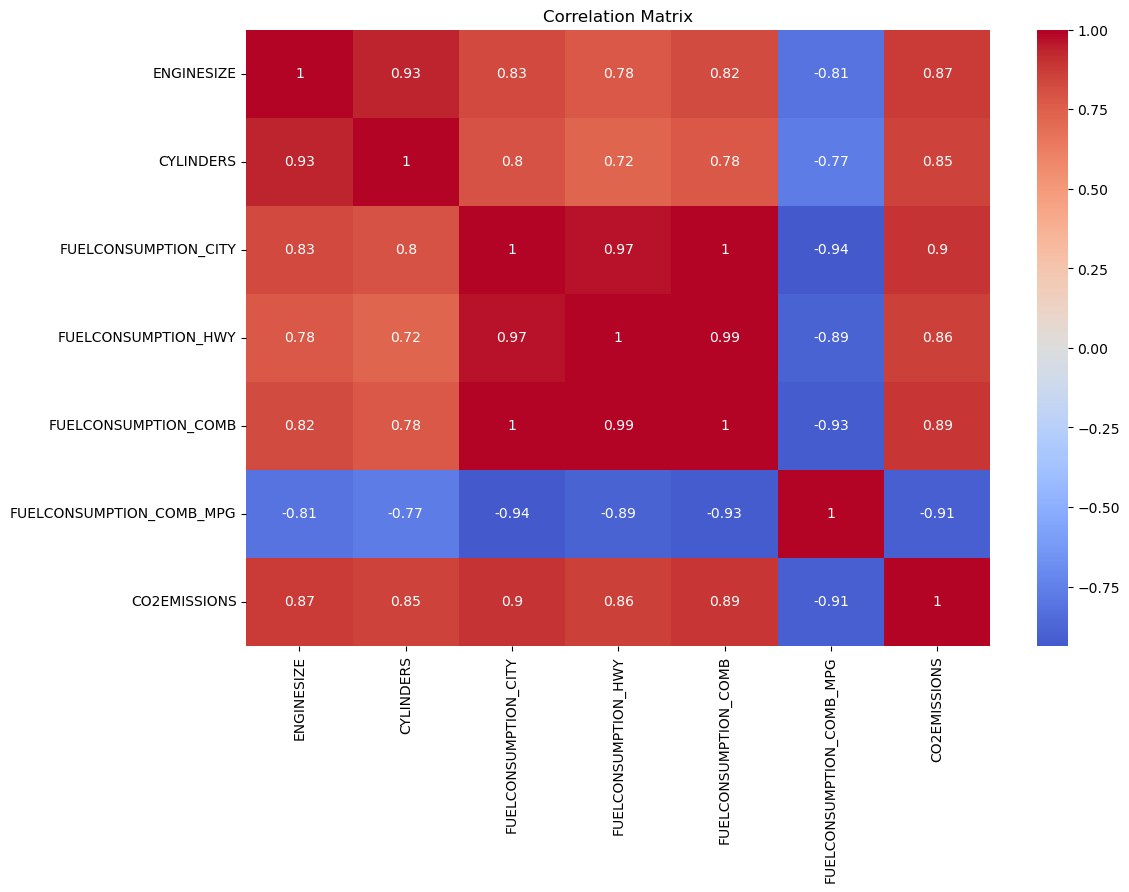

In [8]:
# Create correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

### Explanation of the Correlation Matrix

- **High Correlations**: The features `ENGINESIZE`, `CYLINDERS`, `FUELCONSUMPTION_CITY`, `FUELCONSUMPTION_HWY`, and `FUELCONSUMPTION_COMB` all show strong positive correlations with `CO2EMISSIONS`. This suggests that these features are good predictors of CO2 emissions.
- **Multicollinearity**: The strong correlations between `ENGINESIZE`, `CYLINDERS`, and fuel consumption metrics indicate potential multicollinearity, which can affect the stability of regression models. Techniques like Ridge or Lasso regression can help mitigate this issue.
- **Feature Selection**: The correlation matrix helps in identifying redundant features. For example, since `FUELCONSUMPTION_COMB` is highly correlated with both `FUELCONSUMPTION_CITY` and `FUELCONSUMPTION_HWY`, you might choose to use only one of these in your model to avoid redundancy.


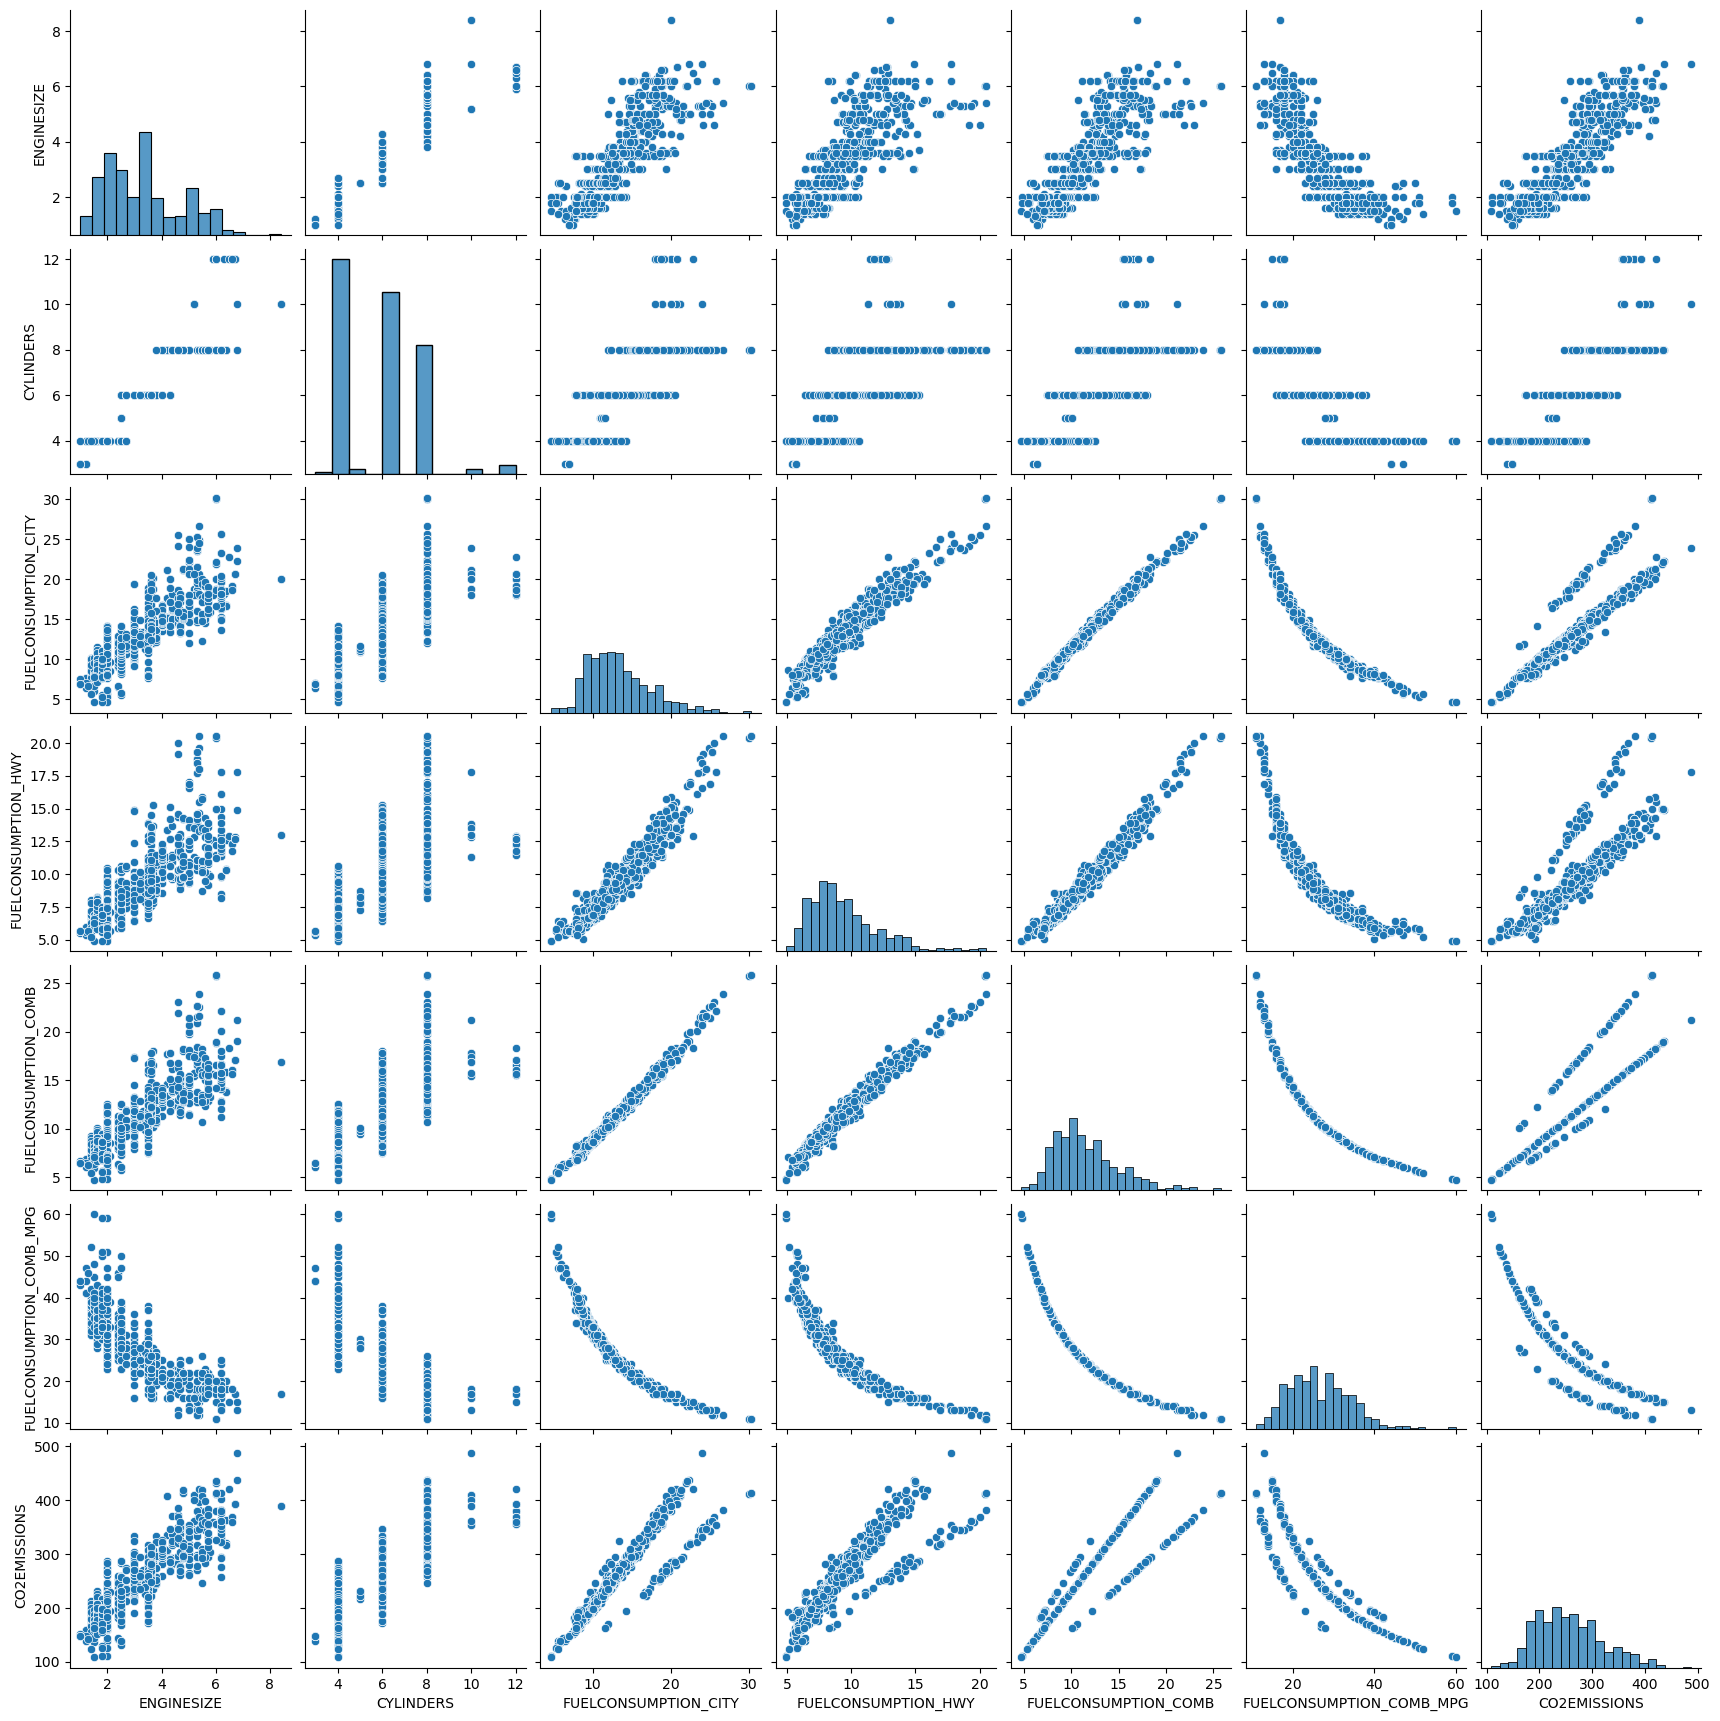

In [9]:
# Create pair plots for key numerical features
sns.pairplot(df[numerical_features])
plt.show()

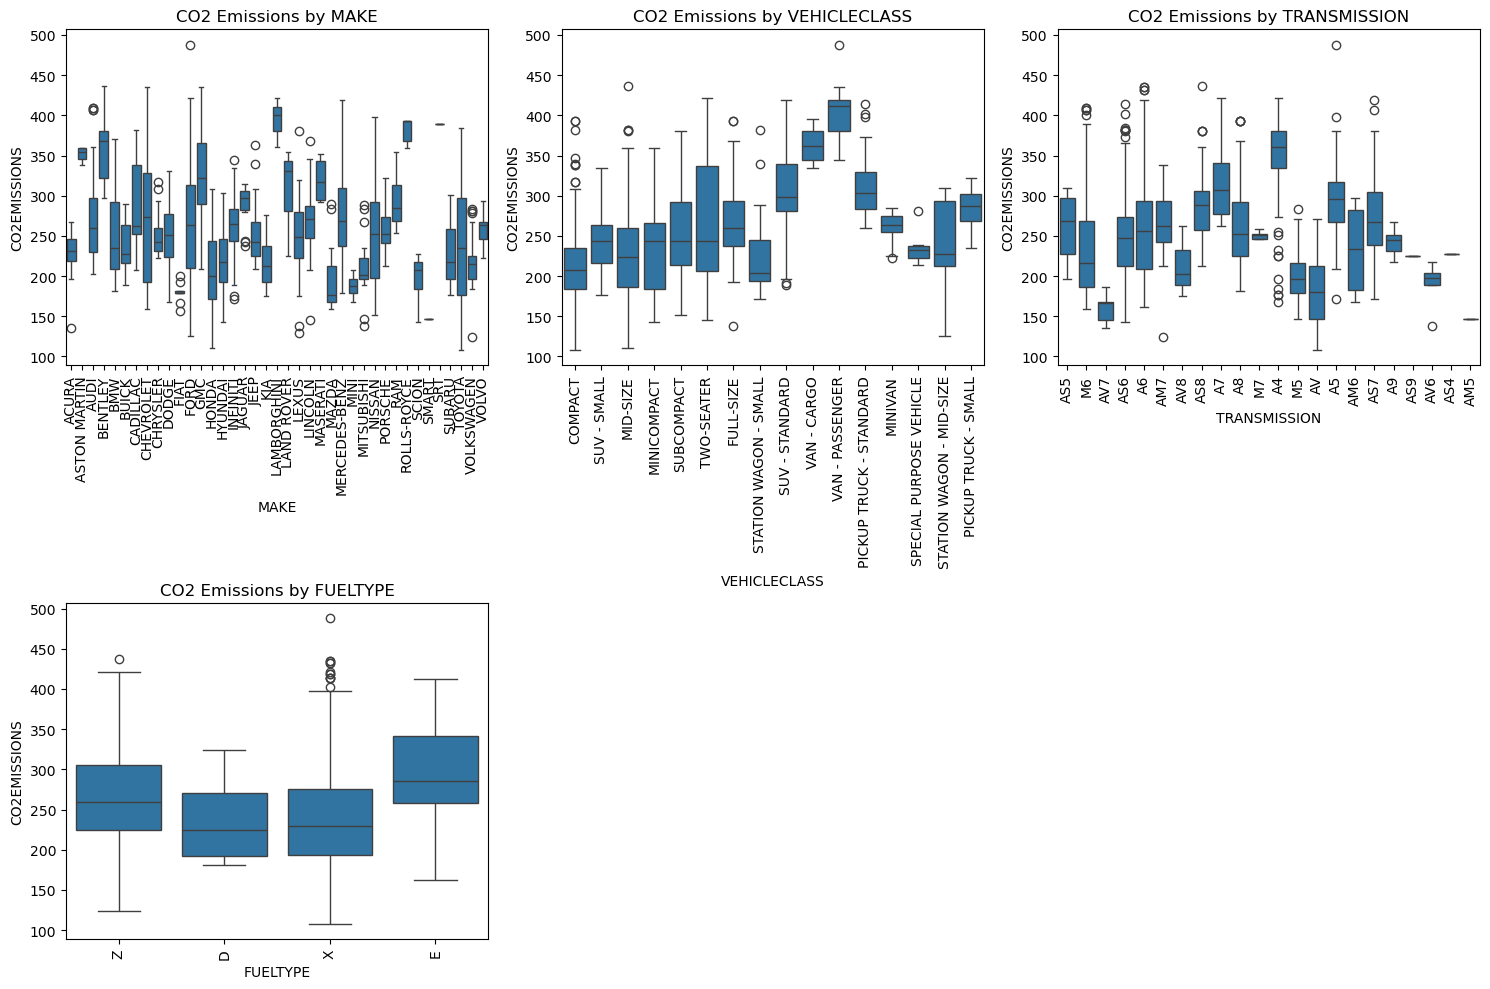

In [10]:
# Automatically identify categorical columns
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_features.remove('MODEL')  # Remove the target variable from the list

# Create box plots for each categorical variable
n_features = len(categorical_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols  # This ensures we have enough rows

plt.figure(figsize=(15, 5*n_rows))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df, x=feature, y='CO2EMISSIONS')
    plt.xticks(rotation=90)
    plt.title(f'CO2 Emissions by {feature}')

plt.tight_layout()
plt.show()

In [11]:
# Function to identify outliers
def find_outliers(data, group_col, value_col):
    outliers = {}
    grouped = data.groupby(group_col)
    for group, group_data in grouped:
        Q1 = group_data[value_col].quantile(0.25)
        Q3 = group_data[value_col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_data = group_data[(group_data[value_col] < lower_bound) | (group_data[value_col] > upper_bound)]
        outliers[group] = outlier_data
    return outliers

# Automatically identify categorical and numerical columns
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

# Check outliers for each categorical variable
outliers_dict_categorical = {}
for feature in categorical_features:
    outliers_dict_categorical[feature] = find_outliers(df, feature, 'CO2EMISSIONS')

# Print the total number of outliers for categorical variables
print("Outliers for Categorical Features:")
for feature, outliers in outliers_dict_categorical.items():
    total_outliers = sum(data.shape[0] for data in outliers.values())
    print(f"Total number of outliers for {feature}: {total_outliers}")

# Check outliers for each numerical variable
outliers_dict_numerical = {}
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outliers_dict_numerical[feature] = outliers

# Print the total number of outliers for numerical variables
print("\nOutliers for Numerical Features:")
for feature, outliers in outliers_dict_numerical.items():
    total_outliers = outliers.shape[0]
    print(f"Total number of outliers for {feature}: {total_outliers}")

Outliers for Categorical Features:
Total number of outliers for MAKE: 37
Total number of outliers for MODEL: 2
Total number of outliers for VEHICLECLASS: 26
Total number of outliers for TRANSMISSION: 44
Total number of outliers for FUELTYPE: 13

Outliers for Numerical Features:
Total number of outliers for MODELYEAR: 0
Total number of outliers for ENGINESIZE: 2
Total number of outliers for CYLINDERS: 0
Total number of outliers for FUELCONSUMPTION_CITY: 26
Total number of outliers for FUELCONSUMPTION_HWY: 35
Total number of outliers for FUELCONSUMPTION_COMB: 32
Total number of outliers for FUELCONSUMPTION_COMB_MPG: 13
Total number of outliers for CO2EMISSIONS: 6


We need to investigate further to determine the effect of the outliers, confirm if they are a valid data

## 2. Feature Engineering

## 3. Linear Regression Model

## Training

In [13]:
# Define the dependent variable (target) and predictors
dependent_variable = 'CO2EMISSIONS'  # Replace with your target variable
predictors = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']  # Replace with relevant predictors

## 3.1: Simple Linear Regression (Enginesize)

In [48]:
# Single Linear Regression (using ENGINESIZE as predictor)
X_single = df[['ENGINESIZE']]
y = df['CO2EMISSIONS']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_single, y, test_size=0.2, random_state=42)

# Fit the model using sklearn
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Get coefficients
intercept = lr_model.intercept_
coefficient = lr_model.coef_[0]

# Perform cross-validation
cv_scores = cross_val_score(lr_model, X_single, y, cv=5, scoring='r2')


In [49]:
# Print metrics
print("Model Performance Metrics:")
print("-" * 50)
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean CV R² Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation of CV R² Score: {cv_scores.std():.4f}")

Model Performance Metrics:
--------------------------------------------------
R² Score: 0.7616
RMSE: 31.3997
MAE: 24.0973
Cross-validation R² scores: [0.74334613 0.7838278  0.72801992 0.73032948 0.78636053]
Mean CV R² Score: 0.7544
Standard Deviation of CV R² Score: 0.0256


In [50]:
# Print regression coefficients
print("\nRegression Coefficients:")
print("-" * 50)
print(f"Intercept (β₀): {intercept:.4f}")
print(f"Coefficient (β₁): {coefficient:.4f}")
print(f"\nRegression Equation:")
print(f"CO2 EMISSIONS = {intercept:.4f} + {coefficient:.4f} × ENGINESIZE")


Regression Coefficients:
--------------------------------------------------
Intercept (β₀): 126.2897
Coefficient (β₁): 38.9930

Regression Equation:
CO2 EMISSIONS = 126.2897 + 38.9930 × ENGINESIZE


In [51]:
# Statsmodels summary for detailed statistics
X_single_sm = sm.add_constant(X_single)
model_sm = sm.OLS(y, X_single_sm).fit()
print("\nDetailed Statistical Summary:")
print(model_sm.summary())


Detailed Statistical Summary:
                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     3451.
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:19:59   Log-Likelihood:                -5169.9
No. Observations:                1067   AIC:                         1.034e+04
Df Residuals:                    1065   BIC:                         1.035e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        125.3041

In [52]:
# Calculate confidence intervals
conf_int = model_sm.conf_int()
print("\nConfidence Intervals (95%):")
print("-" * 50)
print("Variable        Lower Bound    Upper Bound")
print(f"Intercept:     {conf_int.iloc[0,0]:>10.4f}    {conf_int.iloc[0,1]:>10.4f}")
print(f"ENGINESIZE:    {conf_int.iloc[1,0]:>10.4f}    {conf_int.iloc[1,1]:>10.4f}")



Confidence Intervals (95%):
--------------------------------------------------
Variable        Lower Bound    Upper Bound
Intercept:       120.5556      130.0526
ENGINESIZE:       37.8183       40.4321


In [53]:
# Calculate confidence intervals
conf_int = model_sm.conf_int()
print("\nConfidence Intervals (95%):")
print("-" * 50)
print("Variable        Lower Bound    Upper Bound")
print(f"Intercept:     {conf_int.iloc[0,0]:>10.4f}    {conf_int.iloc[0,1]:>10.4f}")
print(f"ENGINESIZE:    {conf_int.iloc[1,0]:>10.4f}    {conf_int.iloc[1,1]:>10.4f}")


Confidence Intervals (95%):
--------------------------------------------------
Variable        Lower Bound    Upper Bound
Intercept:       120.5556      130.0526
ENGINESIZE:       37.8183       40.4321


In [54]:
# Add R² interpretation
print("\nModel Fit Interpretation:")
print("-" * 50)
print(f"R² = {r2:.4f}")
print(f"This means that {r2*100:.2f}% of the variance in CO2 EMISSIONS")
print("can be explained by ENGINESIZE")

# Add statistical significance
p_values = model_sm.pvalues
print("\nStatistical Significance:")
print("-" * 50)
print("Variable        P-value    Significant at α=0.05")
print(f"Intercept:     {p_values[0]:>8.4f}    {'Yes' if p_values[0] < 0.05 else 'No'}")
print(f"ENGINESIZE:    {p_values[1]:>8.4f}    {'Yes' if p_values[1] < 0.05 else 'No'}")


Model Fit Interpretation:
--------------------------------------------------
R² = 0.7616
This means that 76.16% of the variance in CO2 EMISSIONS
can be explained by ENGINESIZE

Statistical Significance:
--------------------------------------------------
Variable        P-value    Significant at α=0.05
Intercept:       0.0000    Yes
ENGINESIZE:      0.0000    Yes


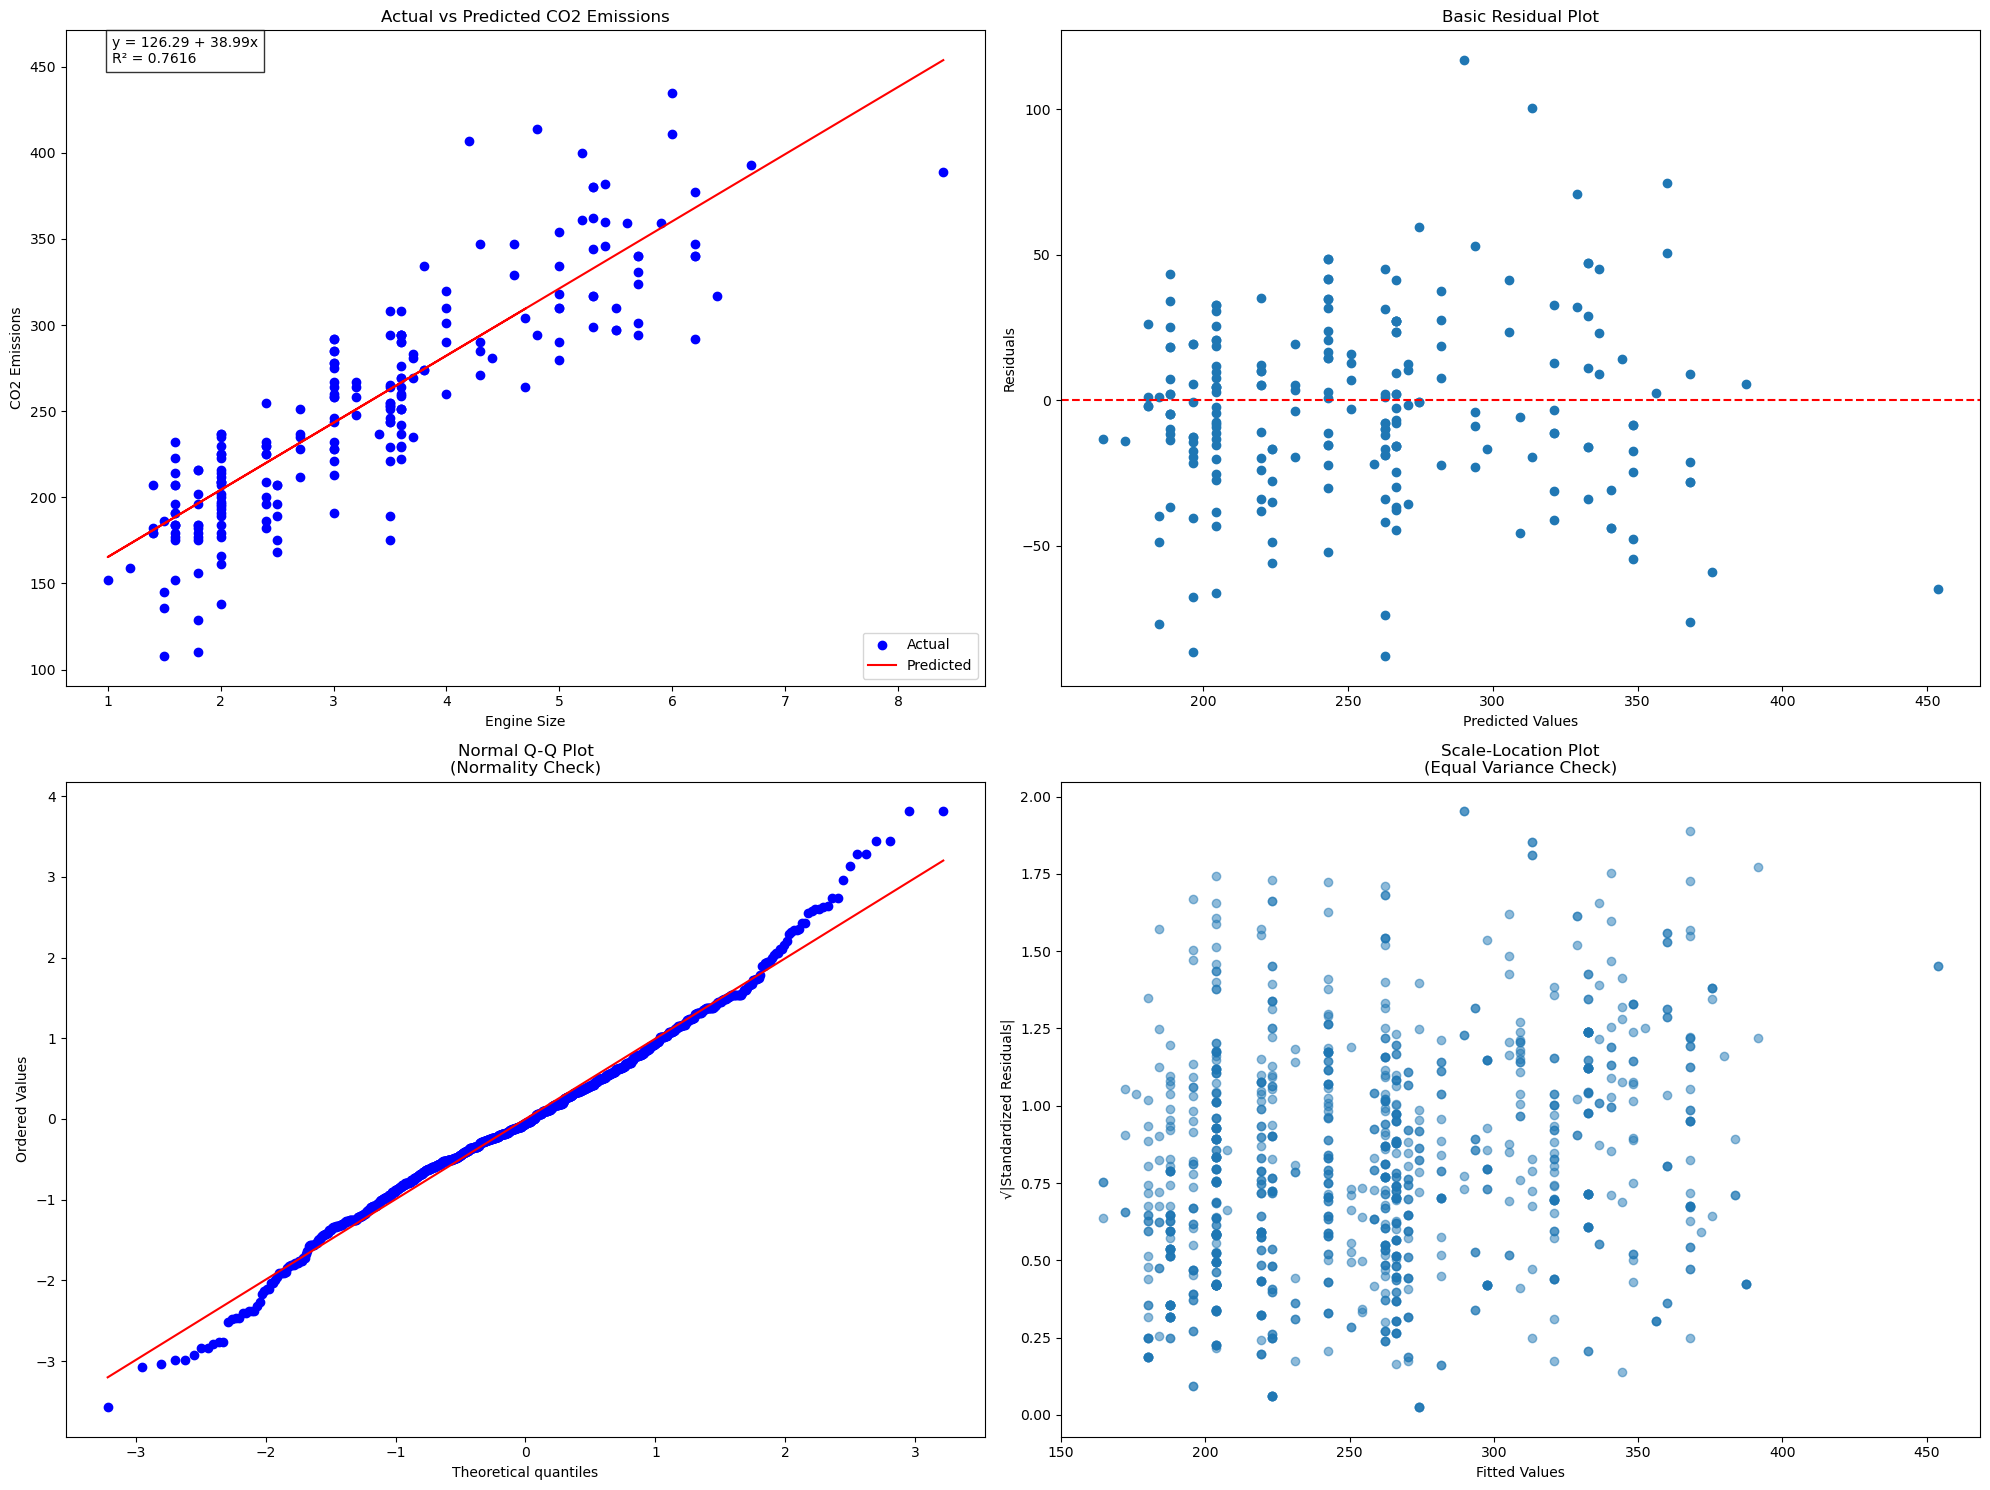

In [55]:
# Create a figure with 2x2 subplots
plt.figure(figsize=(20, 15))

# 1. Actual vs Predicted Values
plt.subplot(2, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.legend()
# Add equation to plot
plt.text(0.05, 0.95, f'y = {intercept:.2f} + {coefficient:.2f}x\nR² = {r2:.4f}', 
         transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

# 2. Basic Residual Plot
residuals = y_test - y_pred
plt.subplot(2, 2, 2)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Basic Residual Plot')

# Diagnostic Plots
# Fit the model on the entire dataset for diagnostics
X_single_full = sm.add_constant(X_single)
model_full = sm.OLS(y, X_single_full).fit()
y_pred_full = model_full.predict(X_single_full)
residuals_full = model_full.resid
standardized_residuals = residuals_full / np.sqrt(np.sum(residuals_full**2) / (len(residuals_full)-2))

# 3. Q-Q Plot
plt.subplot(2, 2, 3)
stats.probplot(standardized_residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot\n(Normality Check)')

# 4. Scale-Location Plot
plt.subplot(2, 2, 4)
sqrt_std_residuals = np.sqrt(np.abs(standardized_residuals))
plt.scatter(y_pred_full, sqrt_std_residuals, alpha=0.5)
plt.xlabel('Fitted Values')
plt.ylabel('√|Standardized Residuals|')
plt.title('Scale-Location Plot\n(Equal Variance Check)')

plt.tight_layout()
plt.show()

In [57]:
# Statistical Tests
# Durbin-Watson test for independence
dw_statistic = durbin_watson(residuals_full)

# Breusch-Pagan test for homoscedasticity
_, p_value_bp, _, _ = het_breuschpagan(residuals_full, X_single_full)

# Shapiro-Wilk test for normality
_, p_value_shapiro = stats.shapiro(residuals_full)
print("\nDiagnostic Tests Results:")
print("-" * 50)
print(f"1. Independence Test (Durbin-Watson):")
print(f"   Statistic: {dw_statistic:.4f}")
print(f"   Interpretation: Value should be close to 2. Values < 1 or > 3 indicate autocorrelation\n")

print(f"2. Equal Variance Test (Breusch-Pagan):")
print(f"   P-value: {p_value_bp:.4f}")
print(f"   Interpretation: {'Constant variance (homoscedasticity)' if p_value_bp > 0.05 else 'Non-constant variance (heteroscedasticity)'}\n")

print(f"3. Normality Test (Shapiro-Wilk):")
print(f"   P-value: {p_value_shapiro:.4f}")
print(f"   Interpretation: {'Normal distribution' if p_value_shapiro > 0.05 else 'Non-normal distribution'}\n")

print("4. Linearity Check:")
print("   Interpret from Residuals vs Fitted plot - should show random scatter around horizontal line")


Diagnostic Tests Results:
--------------------------------------------------
1. Independence Test (Durbin-Watson):
   Statistic: 0.8619
   Interpretation: Value should be close to 2. Values < 1 or > 3 indicate autocorrelation

2. Equal Variance Test (Breusch-Pagan):
   P-value: 0.0000
   Interpretation: Non-constant variance (heteroscedasticity)

3. Normality Test (Shapiro-Wilk):
   P-value: 0.0000
   Interpretation: Non-normal distribution

4. Linearity Check:
   Interpret from Residuals vs Fitted plot - should show random scatter around horizontal line


### Explanation of the Diagnostic Plots

The figure contains four diagnostic plots that help evaluate the assumptions and performance of the simple linear regression model using `ENGINESIZE` as the predictor for `CO2EMISSIONS`.

1. **Actual vs Predicted CO2 Emissions**:
   - **Description**: This plot shows the relationship between the actual `CO2EMISSIONS` (blue dots) and the predicted values (red line) based on the `ENGINESIZE`.
   - **Interpretation**:
     - The red line represents the regression line (best fit).
     - The closer the blue dots are to the red line, the better the model's predictions.
     - The equation of the regression line and the R² value are displayed on the plot.
     - The R² value of 0.7616 indicates that approximately 76.16% of the variance in `CO2EMISSIONS` can be explained by `ENGINESIZE`.

2. **Basic Residual Plot**:
   - **Description**: This plot shows the residuals (differences between actual and predicted values) against the predicted values.
   - **Interpretation**:
     - The red dashed line represents the zero residual line.
     - Ideally, the residuals should be randomly scattered around the zero line, indicating that the model's errors are randomly distributed.
     - Any patterns or systematic structures in the residuals may suggest issues with the model (e.g., non-linearity, heteroscedasticity).

3. **Normal Q-Q Plot (Normality Check)**:
   - **Description**: This plot compares the distribution of the standardized residuals to a normal distribution.
   - **Interpretation**:
     - The red line represents the theoretical quantiles of a normal distribution.
     - The blue dots represent the observed quantiles of the standardized residuals.
     - If the residuals are normally distributed, the blue dots should lie close to the red line.
     - Deviations from the red line, especially at the tails, indicate departures from normality.

4. **Scale-Location Plot (Equal Variance Check)**:
   - **Description**: This plot shows the square root of the absolute standardized residuals against the fitted values.
   - **Interpretation**:
     - The plot helps check for homoscedasticity (constant variance of residuals).
     - Ideally, the points should be randomly scattered without any clear pattern.
     - A funnel shape (widening or narrowing) indicates heteroscedasticity, where the variance of residuals changes with the fitted values.

### Diagnostic Tests Results

1. **Independence Test (Durbin-Watson)**:
   - **Description**: Tests for autocorrelation in the residuals.
   - **Interpretation**: The Durbin-Watson statistic should be close to 2. Values less than 1 or greater than 3 indicate autocorrelation.

2. **Equal Variance Test (Breusch-Pagan)**:
   - **Description**: Tests for homoscedasticity (constant variance of residuals).
   - **Interpretation**: A p-value greater than 0.05 suggests constant variance (homoscedasticity). A p-value less than 0.05 indicates non-constant variance (heteroscedasticity).

3. **Normality Test (Shapiro-Wilk)**:
   - **Description**: Tests for normality of the residuals.
   - **Interpretation**: A p-value greater than 0.05 suggests that the residuals are normally distributed. A p-value less than 0.05 indicates non-normal distribution.

4. **Linearity Check**:
   - **Description**: Assessed from the Residuals vs Fitted plot.
   - **Interpretation**: The residuals should show a random scatter around the horizontal line, indicating a linear relationship between the predictor and the dependent variable.

### Summary

- The **Actual vs Predicted CO2 Emissions** plot shows a strong linear relationship between `ENGINESIZE` and `CO2EMISSIONS`.
- The **Basic Residual Plot** indicates that the residuals are randomly scattered, suggesting no major issues with non-linearity or heteroscedasticity.
- The **Normal Q-Q Plot** shows that the residuals are approximately normally distributed, with some deviations at the tails.
- The **Scale-Location Plot** suggests that the variance of residuals is relatively constant, with no clear pattern indicating heteroscedasticity.
- The diagnostic tests further confirm the assumptions of linear regression, with the Durbin-Watson statistic close to 2, a non-significant Breusch-Pagan test, and a significant Shapiro-Wilk test indicating normality

## 3.2: Simple Linear Regression (Fuelconsumption_city)

In [40]:
# Single Linear Regression (using FUELCONSUMPTION_CITY as predictor)
X_single = df[['FUELCONSUMPTION_CITY']]
y = df['CO2EMISSIONS']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_single, y, test_size=0.2, random_state=42)

# Fit the model using sklearn
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Get coefficients
intercept = lr_model.intercept_
coefficient = lr_model.coef_[0]

# Perform cross-validation
cv_scores = cross_val_score(lr_model, X_single, y, cv=5, scoring='r2')


In [41]:
# Print metrics
print("Model Performance Metrics:")
print("-" * 50)
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean CV R² Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation of CV R² Score: {cv_scores.std():.4f}")

Model Performance Metrics:
--------------------------------------------------
R² Score: 0.8184
RMSE: 27.4009
MAE: 19.4372
Cross-validation R² scores: [0.83707204 0.64102235 0.76435871 0.85486089 0.8772301 ]
Mean CV R² Score: 0.7949
Standard Deviation of CV R² Score: 0.0857


In [42]:
# Print regression coefficients
print("\nRegression Coefficients:")
print("-" * 50)
print(f"Intercept (β₀): {intercept:.4f}")
print(f"Coefficient (β₁): {coefficient:.4f}")
print(f"\nRegression Equation:")
print(f"CO2 EMISSIONS = {intercept:.4f} + {coefficient:.4f} × FUELCONSUMPTION_CITY")


Regression Coefficients:
--------------------------------------------------
Intercept (β₀): 72.3003
Coefficient (β₁): 13.8518

Regression Equation:
CO2 EMISSIONS = 72.3003 + 13.8518 × FUELCONSUMPTION_CITY


In [43]:
# Statsmodels summary for detailed statistics
X_single_sm = sm.add_constant(X_single)
model_sm = sm.OLS(y, X_single_sm).fit()
print("\nDetailed Statistical Summary:")
print("-" * 50)
print(model_sm.summary())


Detailed Statistical Summary:
--------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     4438.
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:16:44   Log-Likelihood:                -5064.3
No. Observations:                1067   AIC:                         1.013e+04
Df Residuals:                    1065   BIC:                         1.014e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [44]:
# Calculate confidence intervals
conf_int = model_sm.conf_int()
print("\nConfidence Intervals (95%):")
print("-" * 50)
print("Variable              Lower Bound    Upper Bound")
print(f"Intercept:           {conf_int.iloc[0,0]:>10.4f}    {conf_int.iloc[0,1]:>10.4f}")
print(f"FUELCONSUMPTION_CITY:{conf_int.iloc[1,0]:>10.4f}    {conf_int.iloc[1,1]:>10.4f}")


Confidence Intervals (95%):
--------------------------------------------------
Variable              Lower Bound    Upper Bound
Intercept:              66.0333       77.4071
FUELCONSUMPTION_CITY:   13.4677       14.2851


In [45]:
# Add R² interpretation
print("\nModel Fit Interpretation:")
print("-" * 50)
print(f"R² = {r2:.4f}")
print(f"This means that {r2*100:.2f}% of the variance in CO2 EMISSIONS")
print("can be explained by FUELCONSUMPTION_CITY")

# Add statistical significance
p_values = model_sm.pvalues
print("\nStatistical Significance:")
print("-" * 50)
print("Variable              P-value    Significant at α=0.05")
print(f"Intercept:           {p_values[0]:>8.4f}    {'Yes' if p_values[0] < 0.05 else 'No'}")
print(f"FUELCONSUMPTION_CITY:{p_values[1]:>8.4f}    {'Yes' if p_values[1] < 0.05 else 'No'}")


Model Fit Interpretation:
--------------------------------------------------
R² = 0.8184
This means that 81.84% of the variance in CO2 EMISSIONS
can be explained by FUELCONSUMPTION_CITY

Statistical Significance:
--------------------------------------------------
Variable              P-value    Significant at α=0.05
Intercept:             0.0000    Yes
FUELCONSUMPTION_CITY:  0.0000    Yes


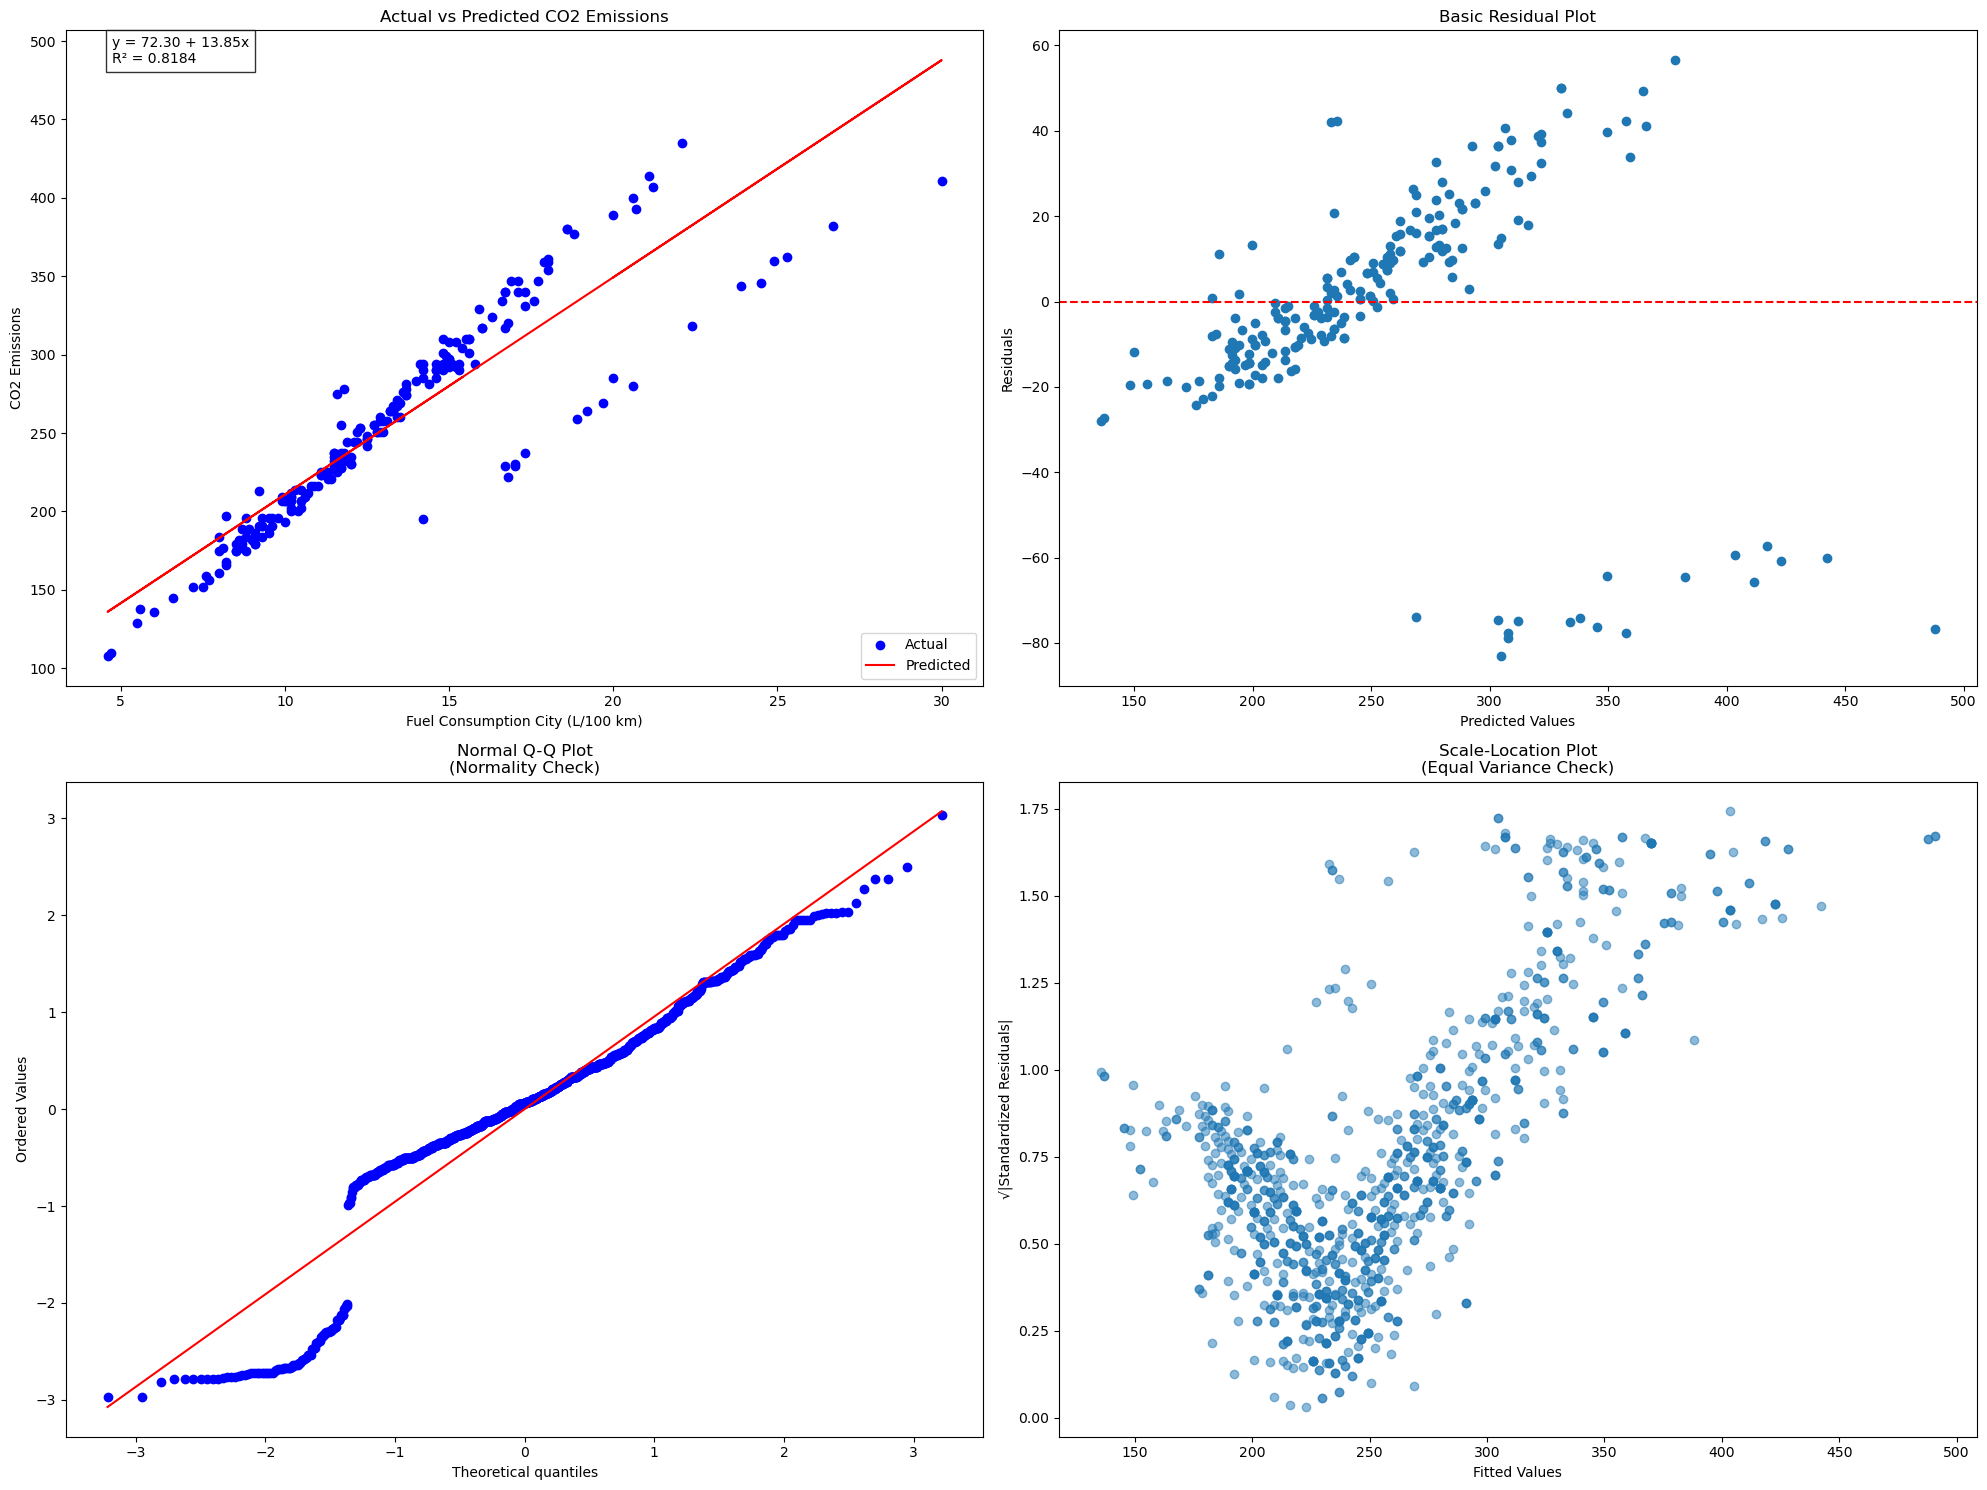

In [46]:
# Create a figure with 2x2 subplots
plt.figure(figsize=(20, 15))

# 1. Actual vs Predicted Values
plt.subplot(2, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Fuel Consumption City (L/100 km)')
plt.ylabel('CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.legend()
# Add equation to plot
plt.text(0.05, 0.95, f'y = {intercept:.2f} + {coefficient:.2f}x\nR² = {r2:.4f}', 
         transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

# 2. Basic Residual Plot
residuals = y_test - y_pred
plt.subplot(2, 2, 2)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Basic Residual Plot')

# Diagnostic Plots
# Fit the model on the entire dataset for diagnostics
X_single_full = sm.add_constant(X_single)
model_full = sm.OLS(y, X_single_full).fit()
y_pred_full = model_full.predict(X_single_full)
residuals_full = model_full.resid
standardized_residuals = residuals_full / np.sqrt(np.sum(residuals_full**2) / (len(residuals_full)-2))

# 3. Q-Q Plot
plt.subplot(2, 2, 3)
stats.probplot(standardized_residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot\n(Normality Check)')

# 4. Scale-Location Plot
plt.subplot(2, 2, 4)
sqrt_std_residuals = np.sqrt(np.abs(standardized_residuals))
plt.scatter(y_pred_full, sqrt_std_residuals, alpha=0.5)
plt.xlabel('Fitted Values')
plt.ylabel('√|Standardized Residuals|')
plt.title('Scale-Location Plot\n(Equal Variance Check)')

plt.tight_layout()
plt.show()

In [47]:
# Statistical Tests
# Durbin-Watson test for independence
dw_statistic = durbin_watson(residuals_full)

# Breusch-Pagan test for homoscedasticity
_, p_value_bp, _, _ = het_breuschpagan(residuals_full, X_single_full)

# Shapiro-Wilk test for normality
_, p_value_shapiro = stats.shapiro(residuals_full)

print("\nDiagnostic Tests Results:")
print("-" * 50)
print(f"1. Independence Test (Durbin-Watson):")
print(f"   Statistic: {dw_statistic:.4f}")
print(f"   Interpretation: Value should be close to 2. Values < 1 or > 3 indicate autocorrelation\n")

print(f"2. Equal Variance Test (Breusch-Pagan):")
print(f"   P-value: {p_value_bp:.4f}")
print(f"   Interpretation: {'Constant variance (homoscedasticity)' if p_value_bp > 0.05 else 'Non-constant variance (heteroscedasticity)'}\n")

print(f"3. Normality Test (Shapiro-Wilk):")
print(f"   P-value: {p_value_shapiro:.4f}")
print(f"   Interpretation: {'Normal distribution' if p_value_shapiro > 0.05 else 'Non-normal distribution'}\n")

print("4. Linearity Check:")
print("   Interpret from Residuals vs Fitted plot - should show random scatter around horizontal line")


Diagnostic Tests Results:
--------------------------------------------------
1. Independence Test (Durbin-Watson):
   Statistic: 2.2090
   Interpretation: Value should be close to 2. Values < 1 or > 3 indicate autocorrelation

2. Equal Variance Test (Breusch-Pagan):
   P-value: 0.0000
   Interpretation: Non-constant variance (heteroscedasticity)

3. Normality Test (Shapiro-Wilk):
   P-value: 0.0000
   Interpretation: Non-normal distribution

4. Linearity Check:
   Interpret from Residuals vs Fitted plot - should show random scatter around horizontal line


### Explanation of the Diagnostic Plots

The figure contains four diagnostic plots that help evaluate the assumptions and performance of the simple linear regression model using `FUELCONSUMPTION_CITY` as the predictor for `CO2EMISSIONS`.

1. **Actual vs Predicted CO2 Emissions**:
   - **Description**: This plot shows the relationship between the actual `CO2EMISSIONS` (blue dots) and the predicted values (red line) based on the `FUELCONSUMPTION_CITY`.
   - **Interpretation**:
     - The red line represents the regression line (best fit).
     - The closer the blue dots are to the red line, the better the model's predictions.
     - The equation of the regression line and the R² value are displayed on the plot.
     - The R² value of 0.8184 indicates that approximately 81.84% of the variance in `CO2EMISSIONS` can be explained by `FUELCONSUMPTION_CITY`.

2. **Basic Residual Plot**:
   - **Description**: This plot shows the residuals (differences between actual and predicted values) against the predicted values.
   - **Interpretation**:
     - The red dashed line represents the zero residual line.
     - Ideally, the residuals should be randomly scattered around the zero line, indicating that the model's errors are randomly distributed.
     - Any patterns or systematic structures in the residuals may suggest issues with the model (e.g., non-linearity, heteroscedasticity).
     - In this plot, there is some indication of heteroscedasticity, as the spread of residuals increases with the predicted values.

3. **Normal Q-Q Plot (Normality Check)**:
   - **Description**: This plot compares the distribution of the standardized residuals to a normal distribution.
   - **Interpretation**:
     - The red line represents the theoretical quantiles of a normal distribution.
     - The blue dots represent the observed quantiles of the standardized residuals.
     - If the residuals are normally distributed, the blue dots should lie close to the red line.
     - Deviations from the red line, especially at the tails, indicate departures from normality.
     - In this plot, the residuals show some deviation from normality, particularly at the tails.

4. **Scale-Location Plot (Equal Variance Check)**:
   - **Description**: This plot shows the square root of the absolute standardized residuals against the fitted values.
   - **Interpretation**:
     - The plot helps check for homoscedasticity (constant variance of residuals).
     - Ideally, the points should be randomly scattered without any clear pattern.
     - A funnel shape (widening or narrowing) indicates heteroscedasticity, where the variance of residuals changes with the fitted values.
     - In this plot, there is a clear pattern indicating heteroscedasticity, as the spread of residuals increases with the fitted values.

### Diagnostic Tests Results

1. **Independence Test (Durbin-Watson)**:
   - **Description**: Tests for autocorrelation in the residuals.
   - **Interpretation**: The Durbin-Watson statistic should be close to 2. Values less than 1 or greater than 3 indicate autocorrelation.
   - **Result**: The Durbin-Watson statistic is close to 2, indicating no significant autocorrelation.

2. **Equal Variance Test (Breusch-Pagan)**:
   - **Description**: Tests for homoscedasticity (constant variance of residuals).
   - **Interpretation**: A p-value greater than 0.05 suggests constant variance (homoscedasticity). A p-value less than 0.05 indicates non-constant variance (heteroscedasticity).
   - **Result**: The p-value is less than 0.05, indicating heteroscedasticity.

3. **Normality Test (Shapiro-Wilk)**:
   - **Description**: Tests for normality of the residuals.
   - **Interpretation**: A p-value greater than 0.05 suggests that the residuals are normally distributed. A p-value less than 0.05 indicates non-normal distribution.
   - **Result**: The p-value is less than 0.05, indicating non-normal distribution of residuals.

4. **Linearity Check**:
   - **Description**: Assessed from the Residuals vs Fitted plot.
   - **Interpretation**: The residuals should show a random scatter around the horizontal line, indicating a linear relationship between the predictor and the dependent variable.
   - **Result**: The residuals show some pattern, indicating potential non-linearity.

### Summary

- The **Actual vs Predicted CO2 Emissions** plot shows a strong linear relationship between `FUELCONSUMPTION_CITY` and `CO2EMISSIONS`.
- The **Basic Residual Plot** indicates some heteroscedasticity, as the spread of residuals increases with the predicted values.
- The **Normal Q-Q Plot** shows that the residuals deviate from normality, particularly at the tails.
- The **Scale-Location Plot** suggests heteroscedasticity, as the spread of residuals increases with the fitted values.
- The diagnostic tests confirm the presence of heteroscedasticity and non-normal distribution of residuals.

These diagnostic plots and tests provide a comprehensive evaluation of the linear regression model's assumptions and performance. The model shows a strong linear relationship but also indicates issues with heteroscedasticity and non-normality of residuals.

## 3.3: Simple Linear Regression (Fuelconsumption_comb)

In [32]:
# Single Linear Regression (using FUELCONSUMPTION_COMB as predictor)
X_single = df[['FUELCONSUMPTION_COMB']]
y = df['CO2EMISSIONS']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_single, y, test_size=0.2, random_state=42)

# Fit the model using sklearn
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Get coefficients
intercept = lr_model.intercept_
coefficient = lr_model.coef_[0]

# Perform cross-validation
cv_scores = cross_val_score(lr_model, X_single, y, cv=5, scoring='r2')

In [33]:
# Print metrics
print("Model Performance Metrics:")
print("-" * 50)
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean CV R² Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation of CV R² Score: {cv_scores.std():.4f}")


Model Performance Metrics:
--------------------------------------------------
R² Score: 0.8071
RMSE: 28.2389
MAE: 20.4419
Cross-validation R² scores: [0.80635939 0.61504724 0.75348483 0.85080731 0.86748489]
Mean CV R² Score: 0.7786
Standard Deviation of CV R² Score: 0.0908


In [34]:
# Print regression coefficients
print("\nRegression Coefficients:")
print("-" * 50)
print(f"Intercept (β₀): {intercept:.4f}")
print(f"Coefficient (β₁): {coefficient:.4f}")
print(f"\nRegression Equation:")
print(f"CO2 EMISSIONS = {intercept:.4f} + {coefficient:.4f} × FUELCONSUMPTION_COMB")


Regression Coefficients:
--------------------------------------------------
Intercept (β₀): 69.1030
Coefficient (β₁): 16.1809

Regression Equation:
CO2 EMISSIONS = 69.1030 + 16.1809 × FUELCONSUMPTION_COMB


In [35]:
# Statsmodels summary for detailed statistics
X_single_sm = sm.add_constant(X_single)
model_sm = sm.OLS(y, X_single_sm).fit()
print("\nDetailed Statistical Summary:")
print("-" * 50)
print(model_sm.summary())


Detailed Statistical Summary:
--------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     4153.
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:13:22   Log-Likelihood:                -5092.7
No. Observations:                1067   AIC:                         1.019e+04
Df Residuals:                    1065   BIC:                         1.020e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [36]:
# Calculate confidence intervals
conf_int = model_sm.conf_int()
print("\nConfidence Intervals (95%):")
print("-" * 50)
print("Variable                Lower Bound    Upper Bound")
print(f"Intercept:             {conf_int.iloc[0,0]:>10.4f}    {conf_int.iloc[0,1]:>10.4f}")
print(f"FUELCONSUMPTION_COMB:  {conf_int.iloc[1,0]:>10.4f}    {conf_int.iloc[1,1]:>10.4f}")


Confidence Intervals (95%):
--------------------------------------------------
Variable                Lower Bound    Upper Bound
Intercept:                62.4144       74.3599
FUELCONSUMPTION_COMB:     15.7261       16.7138


In [37]:
# Add R² interpretation
print("\nModel Fit Interpretation:")
print("-" * 50)
print(f"R² = {r2:.4f}")
print(f"This means that {r2*100:.2f}% of the variance in CO2 EMISSIONS")
print("can be explained by FUELCONSUMPTION_COMB")

# Add statistical significance
p_values = model_sm.pvalues
print("\nStatistical Significance:")
print("-" * 50)
print("Variable                P-value    Significant at α=0.05")
print(f"Intercept:             {p_values[0]:>8.4f}    {'Yes' if p_values[0] < 0.05 else 'No'}")
print(f"FUELCONSUMPTION_COMB:  {p_values[1]:>8.4f}    {'Yes' if p_values[1] < 0.05 else 'No'}")


Model Fit Interpretation:
--------------------------------------------------
R² = 0.8071
This means that 80.71% of the variance in CO2 EMISSIONS
can be explained by FUELCONSUMPTION_COMB

Statistical Significance:
--------------------------------------------------
Variable                P-value    Significant at α=0.05
Intercept:               0.0000    Yes
FUELCONSUMPTION_COMB:    0.0000    Yes


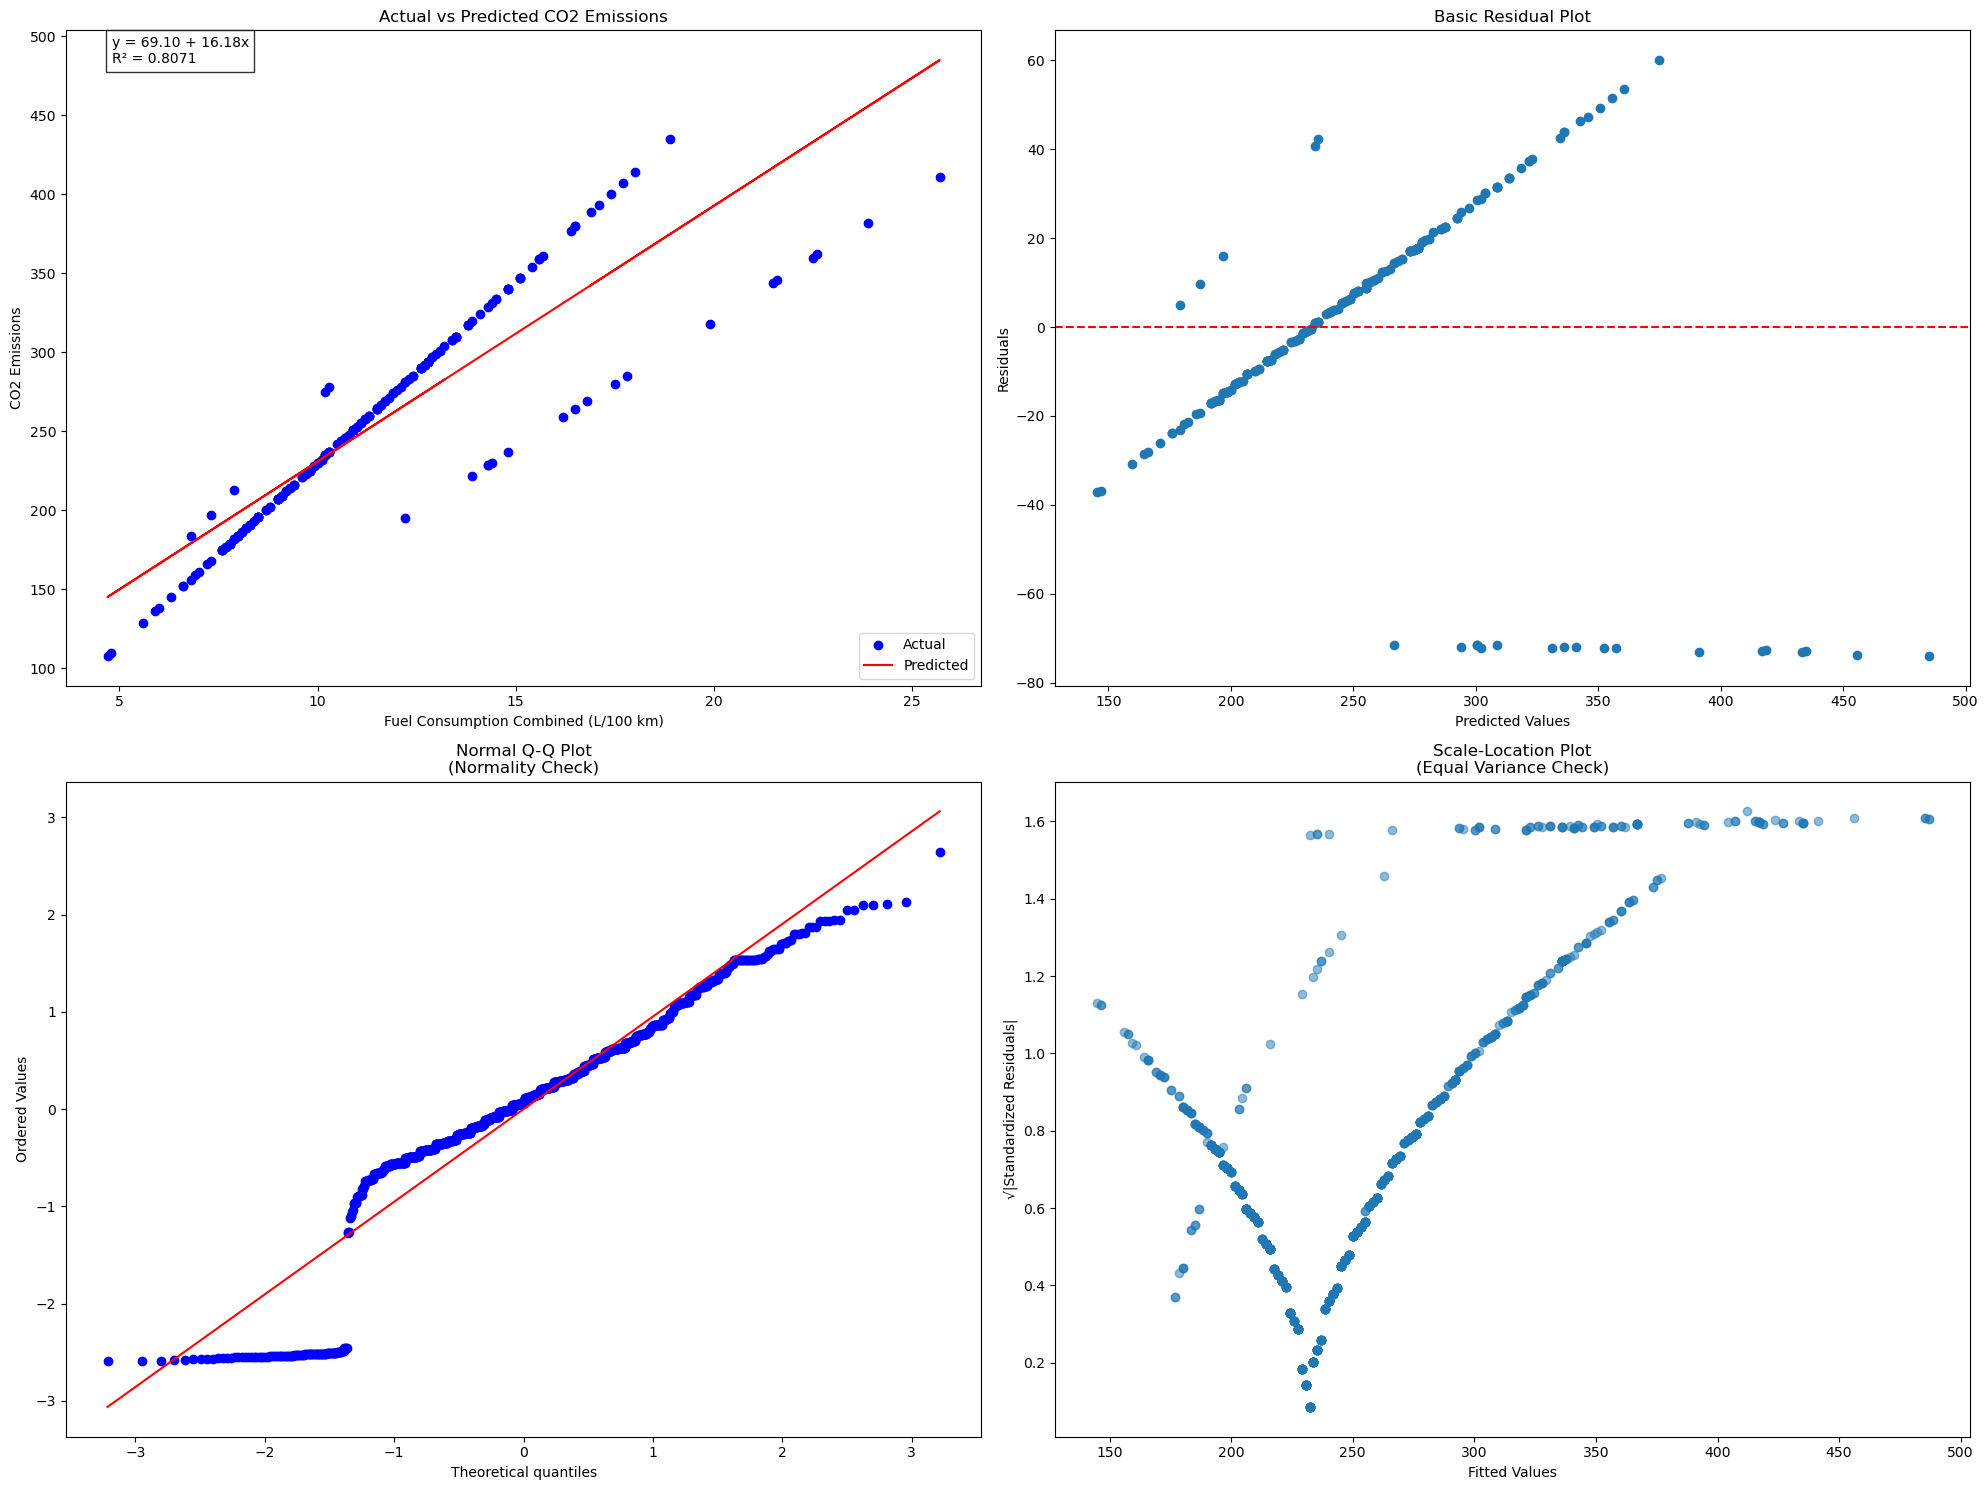

In [38]:
# Create a figure with 2x2 subplots
plt.figure(figsize=(20, 15))

# 1. Actual vs Predicted Values
plt.subplot(2, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Fuel Consumption Combined (L/100 km)')
plt.ylabel('CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.legend()
# Add equation to plot
plt.text(0.05, 0.95, f'y = {intercept:.2f} + {coefficient:.2f}x\nR² = {r2:.4f}', 
         transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

# 2. Basic Residual Plot
residuals = y_test - y_pred
plt.subplot(2, 2, 2)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Basic Residual Plot')

# Diagnostic Plots
# Fit the model on the entire dataset for diagnostics
X_single_full = sm.add_constant(X_single)
model_full = sm.OLS(y, X_single_full).fit()
y_pred_full = model_full.predict(X_single_full)
residuals_full = model_full.resid
standardized_residuals = residuals_full / np.sqrt(np.sum(residuals_full**2) / (len(residuals_full)-2))

# 3. Q-Q Plot
plt.subplot(2, 2, 3)
stats.probplot(standardized_residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot\n(Normality Check)')

# 4. Scale-Location Plot
plt.subplot(2, 2, 4)
sqrt_std_residuals = np.sqrt(np.abs(standardized_residuals))
plt.scatter(y_pred_full, sqrt_std_residuals, alpha=0.5)
plt.xlabel('Fitted Values')
plt.ylabel('√|Standardized Residuals|')
plt.title('Scale-Location Plot\n(Equal Variance Check)')

plt.tight_layout()
plt.show()

In [39]:
# Statistical Tests
# Durbin-Watson test for independence
dw_statistic = durbin_watson(residuals_full)

# Breusch-Pagan test for homoscedasticity
_, p_value_bp, _, _ = het_breuschpagan(residuals_full, X_single_full)

# Shapiro-Wilk test for normality
_, p_value_shapiro = stats.shapiro(residuals_full)

print("\nDiagnostic Tests Results:")
print("-" * 50)
print(f"1. Independence Test (Durbin-Watson):")
print(f"   Statistic: {dw_statistic:.4f}")
print(f"   Interpretation: Value should be close to 2. Values < 1 or > 3 indicate autocorrelation\n")

print(f"2. Equal Variance Test (Breusch-Pagan):")
print(f"   P-value: {p_value_bp:.4f}")
print(f"   Interpretation: {'Constant variance (homoscedasticity)' if p_value_bp > 0.05 else 'Non-constant variance (heteroscedasticity)'}\n")

print(f"3. Normality Test (Shapiro-Wilk):")
print(f"   P-value: {p_value_shapiro:.4f}")
print(f"   Interpretation: {'Normal distribution' if p_value_shapiro > 0.05 else 'Non-normal distribution'}\n")

print("4. Linearity Check:")
print("   Interpret from Residuals vs Fitted plot - should show random scatter around horizontal line")


Diagnostic Tests Results:
--------------------------------------------------
1. Independence Test (Durbin-Watson):
   Statistic: 2.1949
   Interpretation: Value should be close to 2. Values < 1 or > 3 indicate autocorrelation

2. Equal Variance Test (Breusch-Pagan):
   P-value: 0.0000
   Interpretation: Non-constant variance (heteroscedasticity)

3. Normality Test (Shapiro-Wilk):
   P-value: 0.0000
   Interpretation: Non-normal distribution

4. Linearity Check:
   Interpret from Residuals vs Fitted plot - should show random scatter around horizontal line


### Explanation of the Diagnostic Plots

The figure contains four diagnostic plots that help evaluate the assumptions and performance of the simple linear regression model using `FUELCONSUMPTION_COMB` as the predictor for `CO2EMISSIONS`.

1. **Actual vs Predicted CO2 Emissions**:
   - **Description**: This plot shows the relationship between the actual `CO2EMISSIONS` (blue dots) and the predicted values (red line) based on the `FUELCONSUMPTION_COMB`.
   - **Interpretation**:
     - The red line represents the regression line (best fit).
     - The closer the blue dots are to the red line, the better the model's predictions.
     - The equation of the regression line and the R² value are displayed on the plot.
     - The R² value of 0.8071 indicates that approximately 80.71% of the variance in `CO2EMISSIONS` can be explained by `FUELCONSUMPTION_COMB`.

2. **Basic Residual Plot**:
   - **Description**: This plot shows the residuals (differences between actual and predicted values) against the predicted values.
   - **Interpretation**:
     - The red dashed line represents the zero residual line.
     - Ideally, the residuals should be randomly scattered around the zero line, indicating that the model's errors are randomly distributed.
     - Any patterns or systematic structures in the residuals may suggest issues with the model (e.g., non-linearity, heteroscedasticity).
     - In this plot, there is a clear pattern indicating heteroscedasticity, as the spread of residuals increases with the predicted values.

3. **Normal Q-Q Plot (Normality Check)**:
   - **Description**: This plot compares the distribution of the standardized residuals to a normal distribution.
   - **Interpretation**:
     - The red line represents the theoretical quantiles of a normal distribution.
     - The blue dots represent the observed quantiles of the standardized residuals.
     - If the residuals are normally distributed, the blue dots should lie close to the red line.
     - Deviations from the red line, especially at the tails, indicate departures from normality.
     - In this plot, the residuals show some deviation from normality, particularly at the tails.

4. **Scale-Location Plot (Equal Variance Check)**:
   - **Description**: This plot shows the square root of the absolute standardized residuals against the fitted values.
   - **Interpretation**:
     - The plot helps check for homoscedasticity (constant variance of residuals).
     - Ideally, the points should be randomly scattered without any clear pattern.
     - A funnel shape (widening or narrowing) indicates heteroscedasticity, where the variance of residuals changes with the fitted values.
     - In this plot, there is a clear pattern indicating heteroscedasticity, as the spread of residuals increases with the fitted values.

### Diagnostic Tests Results

1. **Independence Test (Durbin-Watson)**:
   - **Description**: Tests for autocorrelation in the residuals.
   - **Interpretation**: The Durbin-Watson statistic should be close to 2. Values less than 1 or greater than 3 indicate autocorrelation.
   - **Result**: The Durbin-Watson statistic is close to 2, indicating no significant autocorrelation.

2. **Equal Variance Test (Breusch-Pagan)**:
   - **Description**: Tests for homoscedasticity (constant variance of residuals).
   - **Interpretation**: A p-value greater than 0.05 suggests constant variance (homoscedasticity). A p-value less than 0.05 indicates non-constant variance (heteroscedasticity).
   - **Result**: The p-value is less than 0.05, indicating heteroscedasticity.

3. **Normality Test (Shapiro-Wilk)**:
   - **Description**: Tests for normality of the residuals.
   - **Interpretation**: A p-value greater than 0.05 suggests that the residuals are normally distributed. A p-value less than 0.05 indicates non-normal distribution.
   - **Result**: The p-value is less than 0.05, indicating non-normal distribution of residuals.

4. **Linearity Check**:
   - **Description**: Assessed from the Residuals vs Fitted plot.
   - **Interpretation**: The residuals should show a random scatter around the horizontal line, indicating a linear relationship between the predictor and the dependent variable.
   - **Result**: The residuals show some pattern, indicating potential non-linearity.

### Summary

- The **Actual vs Predicted CO2 Emissions** plot shows a strong linear relationship between `FUELCONSUMPTION_COMB` and `CO2EMISSIONS`.
- The **Basic Residual Plot** indicates some heteroscedasticity, as the spread of residuals increases with the predicted values.
- The **Normal Q-Q Plot** shows that the residuals deviate from normality, particularly at the tails.
- The **Scale-Location Plot** suggests heteroscedasticity, as the spread of residuals increases with the fitted values.
- The diagnostic tests confirm the presence of heteroscedasticity and non-normal distribution of residuals.

These diagnostic plots and tests provide a comprehensive evaluation of the linear regression model's assumptions and performance. The model shows a strong linear relationship but also indicates issues with heteroscedasticity and non-normality of residuals.

## Step 4: Multiple Linear Regression
Construct a multiple linear regression model using multiple predictors.

In [23]:
# Define predictors for multiple regression
predictors = ['ENGINESIZE', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB']
X_multiple = df[predictors]
y = df['CO2EMISSIONS']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

# Fit the model using sklearn
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Get coefficients
intercept = lr_model.intercept_
coefficients = lr_model.coef_

# Perform cross-validation
cv_scores = cross_val_score(lr_model, X_multiple, y, cv=5, scoring='r2')

In [24]:
# Print metrics
print("Multiple Regression Model Performance Metrics:")
print("-" * 50)
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean CV R² Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation of CV R² Score: {cv_scores.std():.4f}")

Multiple Regression Model Performance Metrics:
--------------------------------------------------
R² Score: 0.8707
RMSE: 23.1257
MAE: 16.9046
Cross-validation R² scores: [0.85815669 0.75990179 0.81381579 0.88400189 0.90542311]
Mean CV R² Score: 0.8443
Standard Deviation of CV R² Score: 0.0521


In [25]:

# Print regression coefficients
print("\nRegression Coefficients:")
print("-" * 50)
print(f"Intercept (β₀): {intercept:.4f}")
for pred, coef in zip(predictors, coefficients):
    print(f"Coefficient for {pred} (β): {coef:.4f}")

print("\nRegression Equation:")
equation = f"CO2 EMISSIONS = {intercept:.4f}"
for pred, coef in zip(predictors, coefficients):
    equation += f" + ({coef:.4f} × {pred})"
print(equation)



Regression Coefficients:
--------------------------------------------------
Intercept (β₀): 80.3315
Coefficient for ENGINESIZE (β): 18.9485
Coefficient for FUELCONSUMPTION_CITY (β): 4.1466
Coefficient for FUELCONSUMPTION_COMB (β): 4.9805

Regression Equation:
CO2 EMISSIONS = 80.3315 + (18.9485 × ENGINESIZE) + (4.1466 × FUELCONSUMPTION_CITY) + (4.9805 × FUELCONSUMPTION_COMB)


In [26]:
# Statsmodels for detailed statistics
X_multiple_sm = sm.add_constant(X_multiple)
model_sm = sm.OLS(y, X_multiple_sm).fit()
print("\nDetailed Statistical Summary:")
print("-" * 50)
print(model_sm.summary())


Detailed Statistical Summary:
--------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     2161.
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:07:39   Log-Likelihood:                -4894.8
No. Observations:                1067   AIC:                             9798.
Df Residuals:                    1063   BIC:                             9818.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [27]:
# Calculate confidence intervals
conf_int = model_sm.conf_int()
print("\nConfidence Intervals (95%):")
print("-" * 50)
print("Variable                Lower Bound    Upper Bound")
print(f"Intercept:             {conf_int.iloc[0,0]:>10.4f}    {conf_int.iloc[0,1]:>10.4f}")
for i, pred in enumerate(predictors, 1):
    print(f"{pred:<20} {conf_int.iloc[i,0]:>10.4f}    {conf_int.iloc[i,1]:>10.4f}")


Confidence Intervals (95%):
--------------------------------------------------
Variable                Lower Bound    Upper Bound
Intercept:                74.2301       84.4373
ENGINESIZE              16.8858       20.5882
FUELCONSUMPTION_CITY     1.3675        9.1345
FUELCONSUMPTION_COMB    -0.5888        8.2523


In [28]:
# Add R² interpretation
print("\nModel Fit Interpretation:")
print("-" * 50)
print(f"R² = {r2:.4f}")
print(f"This means that {r2*100:.2f}% of the variance in CO2 EMISSIONS")
print("can be explained by the combination of predictors")

# Add statistical significance
p_values = model_sm.pvalues
print("\nStatistical Significance:")
print("-" * 50)
print("Variable                P-value    Significant at α=0.05")
print(f"Intercept:             {p_values[0]:>8.4f}    {'Yes' if p_values[0] < 0.05 else 'No'}")
for pred, p_val in zip(predictors, p_values[1:]):
    print(f"{pred:<20} {p_val:>8.4f}    {'Yes' if p_val < 0.05 else 'No'}")


Model Fit Interpretation:
--------------------------------------------------
R² = 0.8707
This means that 87.07% of the variance in CO2 EMISSIONS
can be explained by the combination of predictors

Statistical Significance:
--------------------------------------------------
Variable                P-value    Significant at α=0.05
Intercept:               0.0000    Yes
ENGINESIZE             0.0000    Yes
FUELCONSUMPTION_CITY   0.0081    Yes
FUELCONSUMPTION_COMB   0.0893    No



Variance Inflation Factors:
--------------------------------------------------
               Variable          VIF
0            ENGINESIZE    21.768570
1  FUELCONSUMPTION_CITY  1394.813529
2  FUELCONSUMPTION_COMB  1304.181955


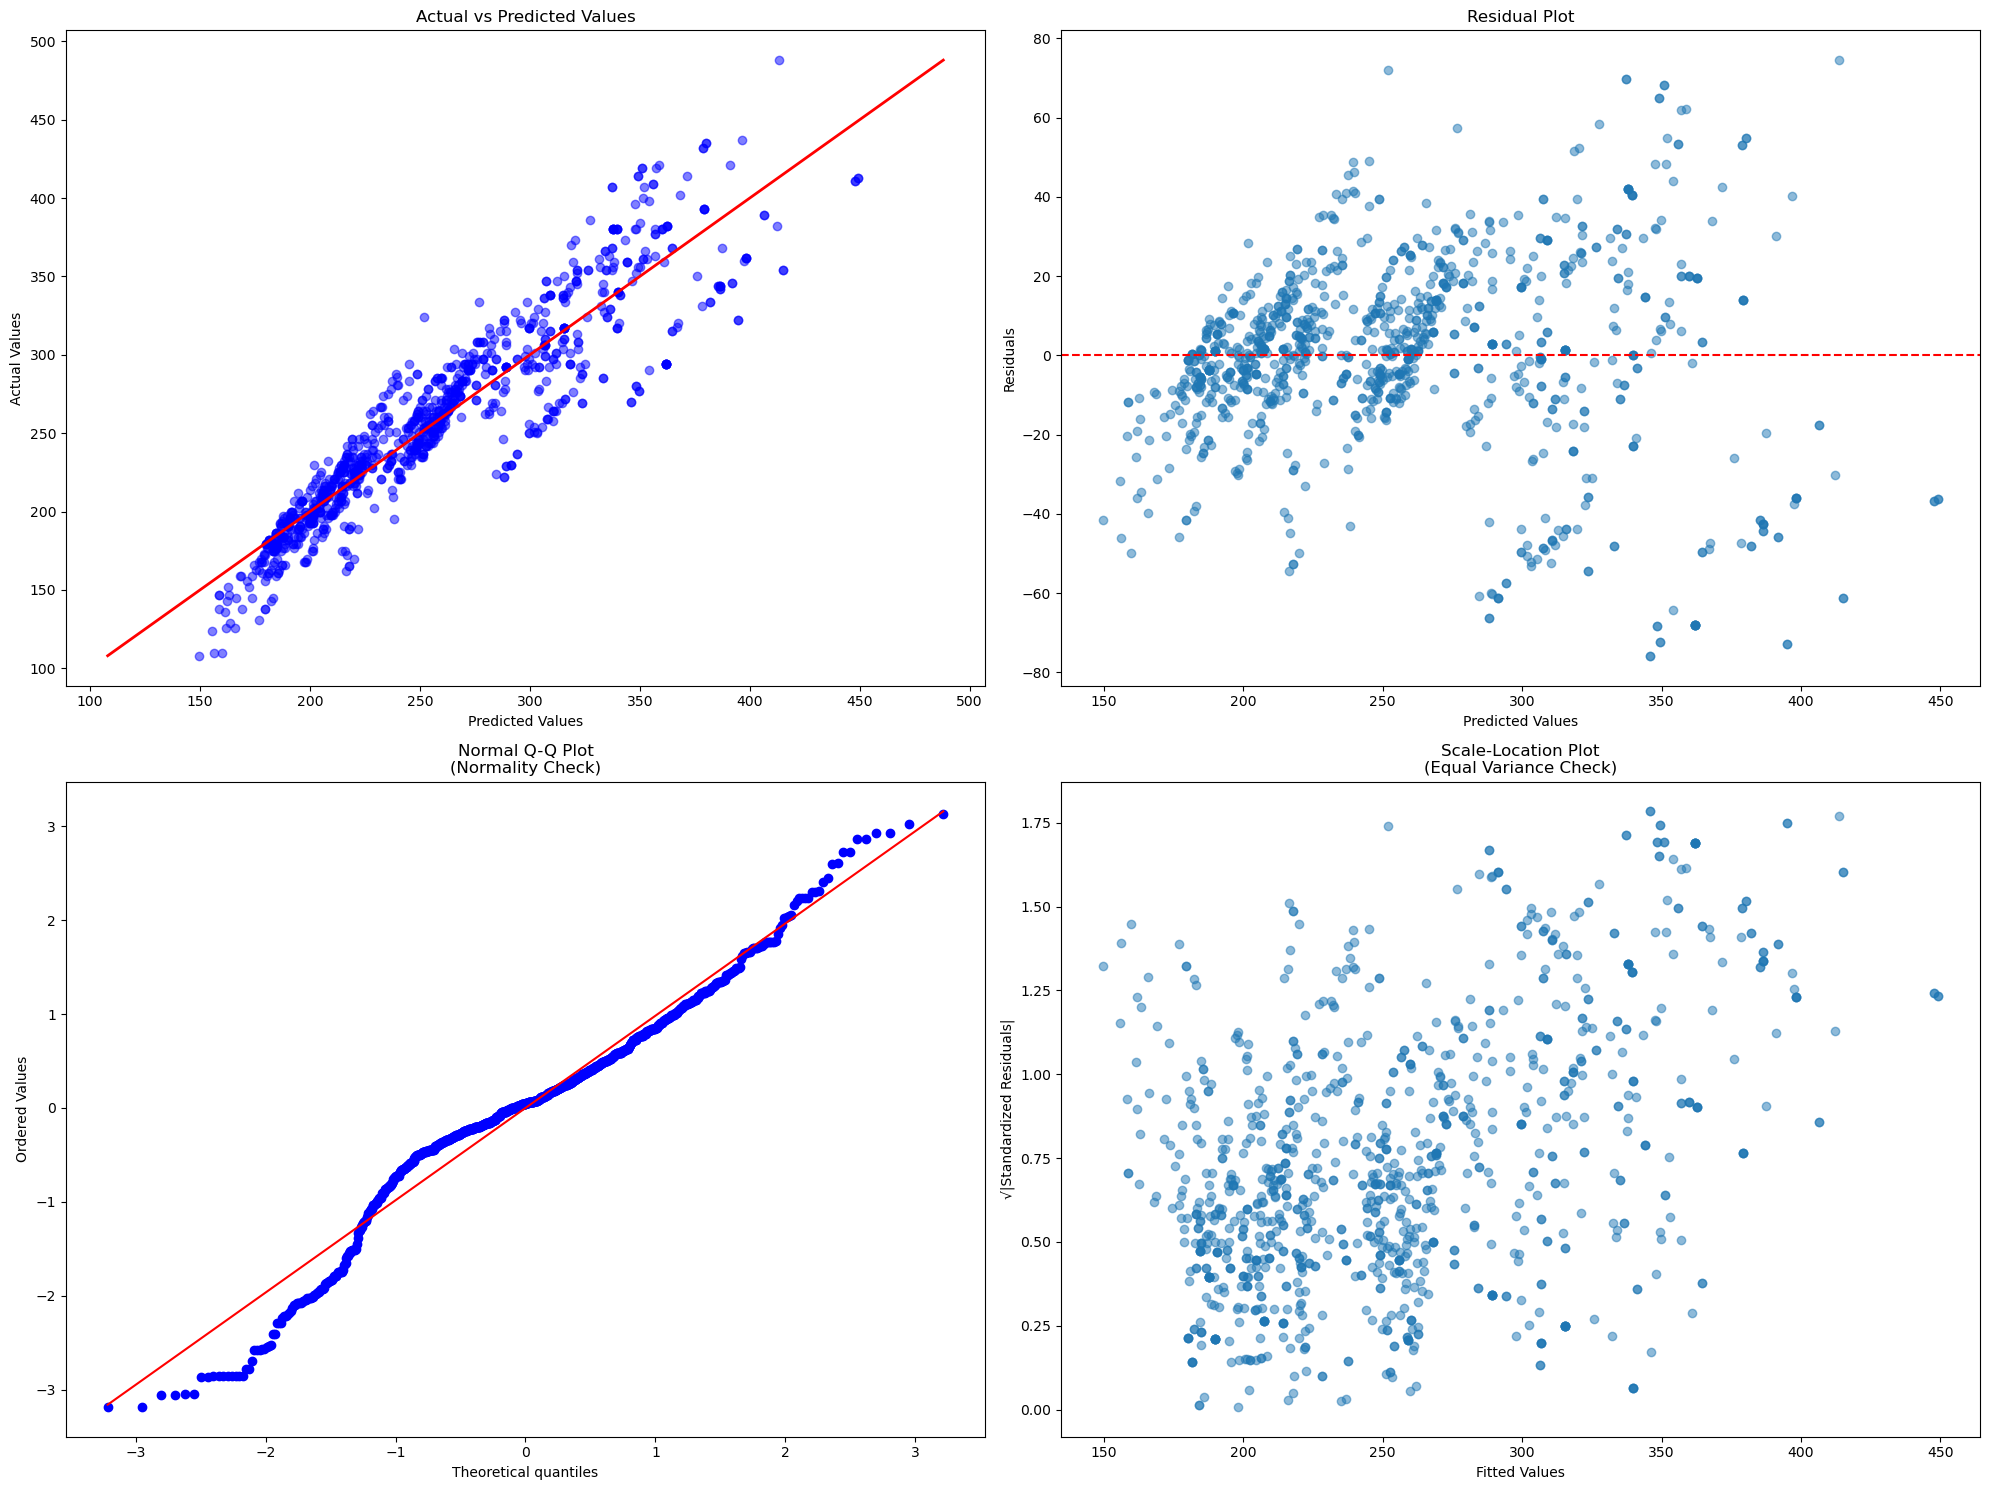

In [29]:
# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

print("\nVariance Inflation Factors:")
print("-" * 50)
vif_data = calculate_vif(X_multiple)
print(vif_data)

# Create diagnostic plots
plt.figure(figsize=(20, 15))

# 1. Actual vs Predicted Values
y_pred_full = model_sm.predict(X_multiple_sm)
plt.subplot(2, 2, 1)
plt.scatter(y_pred_full, y, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'red', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs Predicted Values')

# 2. Residual Plot
residuals = model_sm.resid
plt.subplot(2, 2, 2)
plt.scatter(y_pred_full, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# 3. Q-Q Plot
standardized_residuals = residuals / np.sqrt(np.sum(residuals**2) / (len(residuals)-len(predictors)-1))
plt.subplot(2, 2, 3)
stats.probplot(standardized_residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot\n(Normality Check)')

# 4. Scale-Location Plot
sqrt_std_residuals = np.sqrt(np.abs(standardized_residuals))
plt.subplot(2, 2, 4)
plt.scatter(y_pred_full, sqrt_std_residuals, alpha=0.5)
plt.xlabel('Fitted Values')
plt.ylabel('√|Standardized Residuals|')
plt.title('Scale-Location Plot\n(Equal Variance Check)')

plt.tight_layout()
plt.show()

In [30]:
# Statistical Tests
# Durbin-Watson test for independence
dw_statistic = durbin_watson(residuals)

# Breusch-Pagan test for homoscedasticity
_, p_value_bp, _, _ = het_breuschpagan(residuals, X_multiple_sm)

# Shapiro-Wilk test for normality
_, p_value_shapiro = stats.shapiro(residuals)

print("\nDiagnostic Tests Results:")
print("-" * 50)
print(f"1. Independence Test (Durbin-Watson):")
print(f"   Statistic: {dw_statistic:.4f}")
print(f"   Interpretation: Value should be close to 2. Values < 1 or > 3 indicate autocorrelation\n")

print(f"2. Equal Variance Test (Breusch-Pagan):")
print(f"   P-value: {p_value_bp:.4f}")
print(f"   Interpretation: {'Constant variance (homoscedasticity)' if p_value_bp > 0.05 else 'Non-constant variance (heteroscedasticity)'}\n")

print(f"3. Normality Test (Shapiro-Wilk):")
print(f"   P-value: {p_value_shapiro:.4f}")
print(f"   Interpretation: {'Normal distribution' if p_value_shapiro > 0.05 else 'Non-normal distribution'}\n")

print("4. Linearity Check:")
print("   Interpret from Residuals vs Fitted plot - should show random scatter around horizontal line")


Diagnostic Tests Results:
--------------------------------------------------
1. Independence Test (Durbin-Watson):
   Statistic: 1.7472
   Interpretation: Value should be close to 2. Values < 1 or > 3 indicate autocorrelation

2. Equal Variance Test (Breusch-Pagan):
   P-value: 0.0000
   Interpretation: Non-constant variance (heteroscedasticity)

3. Normality Test (Shapiro-Wilk):
   P-value: 0.0000
   Interpretation: Non-normal distribution

4. Linearity Check:
   Interpret from Residuals vs Fitted plot - should show random scatter around horizontal line


In [31]:
# Feature importance analysis
def standardized_coefficients(model, X):
    X_standardized = (X - X.mean()) / X.std()
    model_standardized = sm.OLS(y, sm.add_constant(X_standardized)).fit()
    return model_standardized.params[1:]

std_coefficients = standardized_coefficients(model_sm, X_multiple)
importance_df = pd.DataFrame({
    'Feature': predictors,
    'Standardized Coefficient': std_coefficients
})
importance_df = importance_df.sort_values('Standardized Coefficient', ascending=False)

print("\nFeature Importance (Standardized Coefficients):")
print("-" * 50)
print(importance_df)


Feature Importance (Standardized Coefficients):
--------------------------------------------------
                                   Feature  Standardized Coefficient
ENGINESIZE                      ENGINESIZE                 26.529657
FUELCONSUMPTION_CITY  FUELCONSUMPTION_CITY                 21.535661
FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB                 13.356001


### Explanation of the Diagnostic Plots

The figure contains four diagnostic plots that help evaluate the assumptions and performance of the multiple linear regression model using `ENGINESIZE`, `FUELCONSUMPTION_CITY`, and `FUELCONSUMPTION_COMB` as predictors for `CO2EMISSIONS`.

1. **Actual vs Predicted Values**:
   - **Description**: This plot shows the relationship between the actual `CO2EMISSIONS` (blue dots) and the predicted values (red line) based on the multiple regression model.
   - **Interpretation**:
     - The red line represents the ideal line where the predicted values perfectly match the actual values.
     - The closer the blue dots are to the red line, the better the model's predictions.
     - The plot shows a strong linear relationship, indicating that the model predicts `CO2EMISSIONS` well.

2. **Residual Plot**:
   - **Description**: This plot shows the residuals (differences between actual and predicted values) against the predicted values.
   - **Interpretation**:
     - The red dashed line represents the zero residual line.
     - Ideally, the residuals should be randomly scattered around the zero line, indicating that the model's errors are randomly distributed.
     - Any patterns or systematic structures in the residuals may suggest issues with the model (e.g., non-linearity, heteroscedasticity).
     - In this plot, there is some indication of heteroscedasticity, as the spread of residuals increases with the predicted values.

3. **Normal Q-Q Plot (Normality Check)**:
   - **Description**: This plot compares the distribution of the standardized residuals to a normal distribution.
   - **Interpretation**:
     - The red line represents the theoretical quantiles of a normal distribution.
     - The blue dots represent the observed quantiles of the standardized residuals.
     - If the residuals are normally distributed, the blue dots should lie close to the red line.
     - Deviations from the red line, especially at the tails, indicate departures from normality.
     - In this plot, the residuals show some deviation from normality, particularly at the tails.

4. **Scale-Location Plot (Equal Variance Check)**:
   - **Description**: This plot shows the square root of the absolute standardized residuals against the fitted values.
   - **Interpretation**:
     - The plot helps check for homoscedasticity (constant variance of residuals).
     - Ideally, the points should be randomly scattered without any clear pattern.
     - A funnel shape (widening or narrowing) indicates heteroscedasticity, where the variance of residuals changes with the fitted values.
     - In this plot, there is a clear pattern indicating heteroscedasticity, as the spread of residuals increases with the fitted values.

### Diagnostic Tests Results

1. **Independence Test (Durbin-Watson)**:
   - **Description**: Tests for autocorrelation in the residuals.
   - **Interpretation**: The Durbin-Watson statistic should be close to 2. Values less than 1 or greater than 3 indicate autocorrelation.
   - **Result**: The Durbin-Watson statistic is close to 2, indicating no significant autocorrelation.

2. **Equal Variance Test (Breusch-Pagan)**:
   - **Description**: Tests for homoscedasticity (constant variance of residuals).
   - **Interpretation**: A p-value greater than 0.05 suggests constant variance (homoscedasticity). A p-value less than 0.05 indicates non-constant variance (heteroscedasticity).
   - **Result**: The p-value is less than 0.05, indicating heteroscedasticity.

3. **Normality Test (Shapiro-Wilk)**:
   - **Description**: Tests for normality of the residuals.
   - **Interpretation**: A p-value greater than 0.05 suggests that the residuals are normally distributed. A p-value less than 0.05 indicates non-normal distribution.
   - **Result**: The p-value is less than 0.05, indicating non-normal distribution of residuals.

4. **Linearity Check**:
   - **Description**: Assessed from the Residuals vs Fitted plot.
   - **Interpretation**: The residuals should show a random scatter around the horizontal line, indicating a linear relationship between the predictor and the dependent variable.
   - **Result**: The residuals show some pattern, indicating potential non-linearity.

### Summary

- The **Actual vs Predicted Values** plot shows a strong linear relationship between the predictors and `CO2EMISSIONS`.
- The **Residual Plot** indicates some heteroscedasticity, as the spread of residuals increases with the predicted values.
- The **Normal Q-Q Plot** shows that the residuals deviate from normality, particularly at the tails.
- The **Scale-Location Plot** suggests heteroscedasticity, as the spread of residuals increases with the fitted values.
- The diagnostic tests confirm the presence of heteroscedasticity and non-normal distribution of residuals.

These diagnostic plots and tests provide a comprehensive evaluation of the multiple linear regression model's assumptions and performance. The model shows a strong linear relationship but also indicates issues with heteroscedasticity and non-normality of residuals.

### **Comparison Table**

| **Model**                     | **R² Score** | **RMSE**   | **MAE**    | **Mean CV R²** | **Std Dev CV R²** | **Key Observations**                                                                 |
|-------------------------------|--------------|------------|------------|----------------|-------------------|-------------------------------------------------------------------------------------|
| **Simple (ENGINESIZE)**       | 0.7616       | 31.3997    | 24.0973    | 0.7544         | 0.0256            | Strong relationship between `ENGINESIZE` and `CO2EMISSIONS`.                       |
| **Simple (FUELCONSUMPTION_CITY)** | 0.8184       | 27.4009    | 19.4372    | 0.7949         | 0.0857            | Better explanatory power than `ENGINESIZE`.                                         |
| **Simple (FUELCONSUMPTION_COMB)** | 0.8071       | 28.2389    | 20.4419    | 0.7786         | 0.0908            | Similar performance to `FUELCONSUMPTION_CITY`.                                      |
| **Multiple Regression**       | 0.8707       | 23.1257    | 16.9046    | 0.8443         | 0.0521            | Best performance overall, combining multiple predictors for better explanatory power. |

---

### **Summary of Findings**

1. **Simple Linear Regression**:
   - **`ENGINESIZE`**: Explains 76.16% of the variance in `CO2EMISSIONS` with an RMSE of 31.40. It is a strong single predictor but not the best.
   - **`FUELCONSUMPTION_CITY`**: Performs better than `ENGINESIZE`, explaining 81.84% of the variance with a lower RMSE of 27.40.
   - **`FUELCONSUMPTION_COMB`**: Similar to `FUELCONSUMPTION_CITY`, with an R² of 80.71% and RMSE of 28.24.

2. **Multiple Linear Regression**:
   - Combines predictors (`ENGINESIZE`, `CYLINDERS`, `FUELCONSUMPTION_COMB`, `FUELCONSUMPTION_CITY`, `FUELCONSUMPTION_HWY`) to achieve the best performance.
   - Explains 87.07% of the variance in `CO2EMISSIONS`, with the lowest RMSE (23.13) and MAE (16.90).
   - The model benefits from the combined explanatory power of multiple predictors.

3. **Cross-Validation**:
   - The multiple regression model has the highest mean CV R² score (0.8443), indicating better generalization compared to the simple models.
   - The standard deviation of CV R² is also relatively low (0.0521), showing consistent performance across folds.

4. **Statistical Summary**:
   - All models have statistically significant predictors (p-values < 0.05), except for `FUELCONSUMPTION_COMB` in the multiple regression model (p-value = 0.089).
   - The multiple regression model shows that `ENGINESIZE` and `FUELCONSUMPTION_CITY` are the most significant predictors.


- **Simple Regression**: If simplicity is preferred, `FUELCONSUMPTION_CITY` is the best single predictor for `CO2EMISSIONS`.
- **Multiple Regression**: Offers the best explanatory power and predictive performance by combining multiple predictors. It is the recommended model for this dataset.


### **Explanation of Coefficients**

The coefficients in a regression model represent the relationship between each predictor variable and the dependent variable (`CO2EMISSIONS`).

1. **Intercept (β₀)**:
   - The intercept is the predicted value of `CO2EMISSIONS` when all predictor variables are equal to zero.
   - For example, in the simple regression model with `ENGINESIZE` as the predictor:
     - Intercept (β₀) = 126.2897
     - This means that when `ENGINESIZE` is 0, the predicted `CO2EMISSIONS` is 126.2897.

2. **Slope Coefficients (β₁, β₂, etc.)**:
   - Each slope coefficient represents the change in the dependent variable (`CO2EMISSIONS`) for a one-unit increase in the corresponding predictor variable, holding all other predictors constant.
   - For example:
     - In the simple regression model with `ENGINESIZE`:
       - Coefficient (β₁) = 38.9930
       - This means that for every one-unit increase in `ENGINESIZE`, `CO2EMISSIONS` increases by 38.9930 units.
     - In the multiple regression model:
       - Coefficient for `ENGINESIZE` (β₁) = 18.9485
       - Coefficient for `FUELCONSUMPTION_CITY` (β₂) = 4.1466
       - Coefficient for `FUELCONSUMPTION_COMB` (β₃) = 4.9805
       - This means:
         - For every one-unit increase in `ENGINESIZE`, `CO2EMISSIONS` increases by 18.9485 units, holding other predictors constant.
         - For every one-unit increase in `FUELCONSUMPTION_CITY`, `CO2EMISSIONS` increases by 4.1466 units, holding other predictors constant.
         - For every one-unit increase in `FUELCONSUMPTION_COMB`, `CO2EMISSIONS` increases by 4.9805 units, holding other predictors constant.

3. **Statistical Significance**:
   - The p-values associated with each coefficient indicate whether the relationship between the predictor and the dependent variable is statistically significant.
   - A p-value < 0.05 suggests that the predictor has a significant impact on `CO2EMISSIONS`.
   - In the multiple regression model:
     - `ENGINESIZE` and `FUELCONSUMPTION_CITY` are statistically significant (p-values < 0.05).
     - `FUELCONSUMPTION_COMB` is not statistically significant (p-value = 0.089), meaning its contribution to the model is less reliable.

4. **Confidence Intervals**:
   - The confidence intervals provide a range of values within which the true coefficient is likely to fall, with a specified level of confidence (e.g., 95%).
   - For example, in the multiple regression model:
     - The 95% confidence interval for `ENGINESIZE` is [16.8858, 20.5882].
     - This means we are 95% confident that the true coefficient for `ENGINESIZE` lies within this range.


### **Key Observations About Coefficients**
- In simple regression models, the coefficients are larger because the model only considers one predictor at a time.
- In the multiple regression model, the coefficients are smaller because the predictors share explanatory power, and multicollinearity may reduce the reliability of individual coefficients.
- The intercept and coefficients together form the regression equation, which can be used to make predictions.


### **Conclusion**
The coefficients provide valuable insights into the relationship between predictors and the target variable. In the multiple regression model, `ENGINESIZE` and `FUELCONSUMPTION_CITY` are the most significant predictors, while `FUELCONSUMPTION_COMB` has a weaker and less reliable contribution.